# Прогнозирование оттока клиентов для телеком компании

<a name="1"></a>
## Содержание

[1. Содержание](#1)

[2. Описание проекта](#2)

*    [2.1. Цель проекта](#21)
*    [2.2. Задачи проекта](#22)
*    [2.3. Описание услуг](#23)
*    [2.4. Описание данных](#24)
*    [2.5. План работы](#25)

[3. Исследование данных](#3)

*    [3.1. Информация о договоре](#31)
*    [3.2. Персональные данные клиента](#32)
*    [3.3. Информация об интернет-услугах](#33)
*    [3.4. Информация об услугах телефонии](#34)
*    [3.5. Вывод](#35)

[4. Анализ данных и подготовка признаков](#4)

*    [4.1. Объединение выборок](#41)
*    [4.2. Целевой признак](#42)
*    [4.3. Переименование признаков](#43)
*    [4.4. Заполнение пропусков](#44)
*    [4.5. Изменение типов данных](#45)
*    [4.6. Преобразование признаков](#46)
*    [4.7. Исследование численных признаков](#47)

   *    [4.7.1. Дата начала пользования услугами](#471)
   *    [4.7.2. Дата окончания пользования услугами](#472)
   *    [4.7.3. Длительность договора](#473)
   *    [4.7.4. Ежемесячные траты на услуги](#474)
   *    [4.7.5. Суммарные траты на услуги](#475)
   *    [4.7.6. Проверка на мультиколлинеарность](#476)
   *    [4.7.7. Вывод по п. 4.7](#477)
    
*    [4.8. Исследование категориальных признаков](#48)

   *    [4.8.1. Распределение категориальных признаков](#481)
   *    [4.8.2. Проверка на мультиколлинеарность](#482)
   *    [4.8.3. Вывод по п. 4.8](#483)
    
*    [4.9. Удаление мультиколлинеарных признаков](#49)
*    [4.10. Вывод](#410)

[5. Подготовка к обучению](#5)

*    [5.1. Разделение данных на выборки](#51)
*    [5.2. Кодирование категориальных признаков](#52)
*    [5.3. Масштабирование численных признаков](#53)

   *    [5.3.1. Для моделей `LogisticRegression`, `RandomForestClassifier` и `LGBMClassifier`](#531)
   *    [5.3.2. Для модели `CatBoostClassifier`](#532)

*    [5.4. Вывод](#54)

[6. Обучение моделей](#6)
    
*    [6.1. Функция для обучения моделей](#61)
*    [6.2. `LogisticRegression`](#62)
*    [6.3. `RandomForestClassifier`](#63)
*    [6.4. `LGBMClassifier`](#64)
*    [6.5. `CatBoostClassifier`](#65)
*    [6.6. Сравнение моделей](#66)
*    [6.7. Вывод](#67)

[7. Тестирование лучшей модели](#7)

*    [7.1. Качество модели](#71)
*    [7.2. `DummyClassifier`](#72)
*    [7.3. Анализ важности признаков](#73)
*    [7.4. Матрица ошибок](#74)
*    [7.5. *ROC*-кривая](#75)
*    [7.6. Вывод](#76)

[8. Общий вывод](#8)

[9. Отчёт по решению задачи](#9)

## Описание проекта
<a name="2"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Цель проекта
<a name="21"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать отток клиентов.

Результаты исследования позволят оператору связи выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия.

### Задачи проекта
<a name="22"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Исследовать данные.
2. Выполнить анализ данных и подготовить признаки.
3. Построить и обучить модели.
4. Протестировать лучшую модель.
5. Написать общий вывод.
6. Написать отчёт.

Значение метрики *AUC-ROC* должно быть не ниже 0.85.

### Описание услуг
<a name="23"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Оператор предоставляет два основных типа услуг:

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию ("DSL", от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель ("Fiber optic").  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных
<a name="24"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020 года.


**Признаки:**

Таблица `contract_new.csv` — информация о договоре:

- `BeginDate` - дата начала пользования услугами
- `EndDate`- дата окончания пользования услугами
- `Type`- тип оплаты: ежемесячный, годовой и т.д.
- `PaperlessBilling`- электронный платёжный документ
- `PaymentMethod`- способ оплаты
- `MonthlyCharges`- ежемесячные траты на услуги
- `TotalCharges`- всего потрачено денег на услуги

Таблица `personal_new.csv` — персональные данные клиента:

- `gender` - пол
- `SeniorCitizen`- наличие пенсионного статуса по возрасту
- `Partner`- наличие супруга(и)
- `Dependents`- наличие иждивенцев

Таблица `internet_new.csv` — информация об интернет-услугах:

- `InternetService` - тип подключения интернета ("DSL" или "Fiber optic")
- `OnlineSecurity` - блокировка небезопасных сайтов
- `OnlineBackup` - облачное хранилище файлов для резервного копирования данных
- `DeviceProtection` - антивирус
- `TechSupport` - выделенная линия технической поддержки
- `StreamingTV` - онлайн ТВ
- `StreamingMovies` - онлайн-кинотеатр

Таблица `phone_new.csv` — информация об услугах телефонии:

- `MultipleLines`- наличие возможности подключения телефонного аппарата к нескольким линиям одовременно

### План работы
<a name="25"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Исследование данных:

   - Размеры выборок.
   - Уникальные значения.
   - Пропуски.
   - Дубликаты.
   - Гисторгамма распределения численных переменных.


2. Анализ данных и подготовка признаков:

   - Объединение выборок (следим за тем, чтобы данные не потерялись).
   - *Feature Engineering* - добавление, удаление и преобразование признаков.
   - Переименование признаков, приведение к нижнему регистру.
   - EDA (*Exploratory Data Analysis*).
   - Визуализация признаков, используя графики.
   - Анализ признаков на мультиколлинеарность (учитываем, что корреляция Пирсона/Спирмена – только для численных признаков, для категориальных – *phi_k*, *VIF*, *Cramer’s V*) и корреляцию с таргетом.
   
    <div class="alert alert-block alert-warning">
⚠️ <b>Ревью 1</b>: Для всех признаков достаточно phik. Этот метод умеет сразу считать корреляцию между числовыми и категориальными признаками.
</div>

   - Проверка на дисбаланс классов, чувствительность метрики к дисбалансу.
   
   
3. Построение и обучение моделей:

   - Разбиение выборки (`test_size`=0.25).
   - Кодирование и масштабирование признаков после разбиения выборок (проверяем правильность кодирования).
   - Построение и обучение моделей: `LogisticRegression`, `RandomForestClassifier`, `LGBMClassifier`, `CatBoostClassifier`. Модели должны выводить метрики *AUC-ROC* и *accuracy*. Пороговое значение для *AUC-ROC* >= 0.85.
   - Подбор гиперпараметров (`GridSearchCV`/`RandomisedSearchCV`).
   - Выбор итоговой модели по результатам кроссвалидации.
         
         
4. Тестирование лучшей модели:

   - Проверка качества итоговой модели на тестовой выборке.
   - Сравнение полученных предсказаний с предсказаниями константной модели с помощью `DummyClassifier`.
   - Проведение анализа важности признаков.
   - Построение и анализ матрицы ошибок.
   - Построение и анализ *ROC* - кривой.


5. Общий вывод.


6. Отчёт.

## Исследование данных
<a name="3"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Импортируем необходимые библиотеки.

In [1]:
!pip install phik
!pip install sklearn
!pip install catboost
!pip install lightgbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
import time
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from phik.report import plot_correlation_matrix

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, \
roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate, GridSearchCV, \
KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle

RANDOM_STATE = 11092023
TEST_SIZE = 0.25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=317552a2063872c18fb3f68d5992b68f79b43126c88d19e637d354189d974616
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


Создадим функцию для загрузки файлов с данными.

In [2]:
def load_data(filename):
    possible_paths = [
        r'C:/Users/Васильев/Desktop/dataframes/' + filename,
        '/datasets/' + filename,
        '/' + filename,
        'https://code.s3.yandex.net/datasets/' + filename,
        '/content/' + filename
    ]

    for path in possible_paths:
        if os.path.exists(path):
            return pd.read_csv(path)

    print('Что-то пошло не так...')
    return None

### Информация о договоре
<a name="31"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные.

In [3]:
contract = load_data('contract_new.csv')

In [4]:
display(contract.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


In [5]:
print(contract.describe())

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000


In [6]:
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


Только признак `MonthlyCharges` имеет числовой тип данных. Остальные признаки имеют тип данных `object`.

In [7]:
print(contract.shape)

(7043, 8)


In [8]:
print(len(contract['customerID'].unique()))

7043


Т.е. все значения `customerID`- уникальны.

In [9]:
print(len(contract['BeginDate'].unique()))
print(contract['BeginDate'].unique())

77
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '2017-01-01'
 '2015-07-01' '2020-02-01' '2016-11-01' '2013-11-01' '2014-01-01'
 '2013-

<a name="month_unique"></a>

In [10]:
print(len(contract['EndDate'].unique()))
print(contract['EndDate'].unique())

67
['No' '2017-05-01' '2016-03-01' '2018-09-01' '2018-11-01' '2018-12-01'
 '2019-08-01' '2018-07-01' '2017-09-01' '2015-09-01' '2016-07-01'
 '2016-06-01' '2018-03-01' '2019-02-01' '2018-06-01' '2019-06-01'
 '2020-01-01' '2019-11-01' '2016-09-01' '2015-06-01' '2016-12-01'
 '2019-05-01' '2019-04-01' '2017-06-01' '2017-08-01' '2018-04-01'
 '2018-08-01' '2018-02-01' '2019-07-01' '2015-12-01' '2014-06-01'
 '2018-10-01' '2019-01-01' '2017-07-01' '2017-12-01' '2018-05-01'
 '2015-11-01' '2019-10-01' '2019-03-01' '2016-02-01' '2016-10-01'
 '2018-01-01' '2017-11-01' '2015-10-01' '2019-12-01' '2015-07-01'
 '2017-04-01' '2015-02-01' '2017-03-01' '2016-05-01' '2016-11-01'
 '2015-08-01' '2019-09-01' '2017-10-01' '2017-02-01' '2016-08-01'
 '2016-04-01' '2015-05-01' '2014-09-01' '2014-10-01' '2017-01-01'
 '2015-03-01' '2015-01-01' '2016-01-01' '2015-04-01' '2014-12-01'
 '2014-11-01']


In [11]:
print(len(contract['Type'].unique()))
print(contract['Type'].unique())

3
['Month-to-month' 'One year' 'Two year']


In [12]:
print(len(contract['PaperlessBilling'].unique()))
print(contract['PaperlessBilling'].unique())

2
['Yes' 'No']


In [13]:
print(len(contract['PaymentMethod'].unique()))
print(contract['PaymentMethod'].unique())

4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
print(len(contract['MonthlyCharges'].unique()))

1585


In [15]:
print(len(contract['TotalCharges'].unique()))

6658


In [16]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Пропусков в данных нет.

In [17]:
contract.duplicated().sum()

0

Явных дубликатов в данных нет.

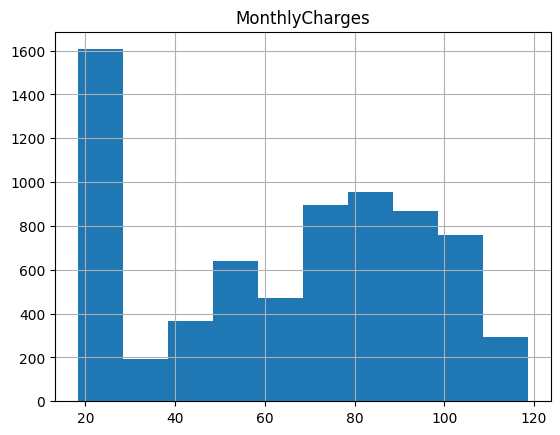

In [18]:
contract.hist();

### Персональные данные клиента
<a name="32"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные.

In [19]:
personal = load_data('personal_new.csv')

In [20]:
display(personal.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [21]:
print(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


Только признак `SeniorCitizen` имеет числовой тип данных. Остальные признаки имеют тип данных `object`.

In [22]:
print(personal.shape)

(7043, 5)


In [23]:
print(len(personal['customerID'].unique()))

7043


Т.е. все значения `customerID`- уникальны.

In [24]:
print(len(personal['gender'].unique()))
print(personal['gender'].unique())

2
['Female' 'Male']


In [25]:
print(len(personal['SeniorCitizen'].unique()))
print(personal['SeniorCitizen'].unique())

2
[0 1]


In [26]:
print(len(personal['Partner'].unique()))
print(personal['Partner'].unique())

2
['Yes' 'No']


In [27]:
print(len(personal['Dependents'].unique()))
print(personal['Dependents'].unique())

2
['No' 'Yes']


In [28]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Пропусков в данных нет.

In [29]:
personal.duplicated().sum()

0

Явных дубликатов в данных нет.

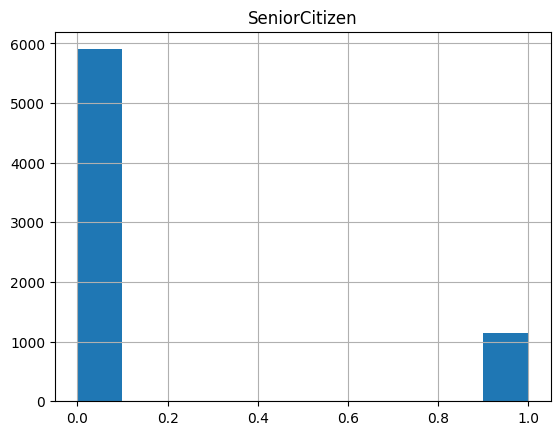

In [30]:
personal.hist();

### Информация об интернет-услугах
<a name="33"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные.

In [31]:
internet = load_data('internet_new.csv')

In [32]:
display(internet.head(10))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [33]:
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


Все признаки имеют тип данных `object`.

In [34]:
print(internet.shape)

(5517, 8)


In [35]:
print(len(internet['customerID'].unique()))

5517


Т.е. все значения `customerID`- уникальны.

In [36]:
print(len(internet['InternetService'].unique()))
print(internet['InternetService'].unique())

2
['DSL' 'Fiber optic']


In [37]:
print(len(internet['OnlineSecurity'].unique()))
print(internet['OnlineSecurity'].unique())

2
['No' 'Yes']


In [38]:
print(len(internet['OnlineBackup'].unique()))
print(internet['OnlineBackup'].unique())

2
['Yes' 'No']


In [39]:
print(len(internet['DeviceProtection'].unique()))
print(internet['DeviceProtection'].unique())

2
['No' 'Yes']


In [40]:
print(len(internet['TechSupport'].unique()))
print(internet['TechSupport'].unique())

2
['No' 'Yes']


In [41]:
print(len(internet['StreamingTV'].unique()))
print(internet['StreamingTV'].unique())

2
['No' 'Yes']


In [42]:
print(len(internet['StreamingMovies'].unique()))
print(internet['StreamingMovies'].unique())

2
['No' 'Yes']


In [43]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Пропусков в данных нет.

In [44]:
internet.duplicated().sum()

0

Явных дубликатов в данных нет.

### Информация об услугах телефонии
<a name="34"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные.

In [45]:
phone = load_data('phone_new.csv')

In [46]:
display(phone.head(10))

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [47]:
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


Все признаки имеют тип данных `object`.

In [48]:
print(phone.shape)

(6361, 2)


In [49]:
print(len(phone['customerID'].unique()))

6361


Т.е. все значения `customerID`- уникальны.

In [50]:
print(len(phone['MultipleLines'].unique()))
print(phone['MultipleLines'].unique())

2
['No' 'Yes']


In [51]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

Пропусков в данных нет.

In [52]:
phone.duplicated().sum()

0

Явных дубликатов в данных нет.

### Вывод
<a name="35"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Исследование данных**](#Исследование-данных) была изучена общая информация о данных, а именно:
1. информация о договоре;
2. персональные данные клиента;
3. информация об интернет-услугах;
4. информация об услугах телефонии.


В результате выполнения задач этого раздела было выявлено следующее:
- В каждой из четырёх таблиц все значения признака `customerID`- уникальны, что даёт возможность объединить выборки по этому признаку с использованием метода `.merge()`.
- Таблицы имеют разные размеры.
- Во всех четырёх таблицах отсутствуют пропуски и явные дубликаты.
- Признаки `MonthlyCharges` и `SeniorCitizen` имеют числовой тип данных, остальные признаки имеют тип данных `object`.

В нашем проекте решается задача **бинарной классификации.**

## Анализ данных и подготовка признаков
<a name="4"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Объединение выборок
<a name="41"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Объединим все 4 датафрейма, в один датафрейм `data` по признаку `customerID` так, чтобы данные не потерялись.

In [53]:
data = contract\
    .merge(personal, how='outer', on='customerID')\
    .merge(internet, how='outer', on='customerID')\
    .merge(phone, how='outer', on='customerID')\
    .reset_index(drop=True)

print(data.shape)
display(data.head())

(7043, 20)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Все 7043 строк и 20 столбцов сохранились в одном датасете.

### Целевой признак
<a name="42"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Основываясь на данных признака `EndDate`, добавим в датасет категориальный **целевой признак** - `outflow` (уход клиента), который принимает значения "1" - клиент ушёл, и "0" - клиент остался.

In [54]:
data['outflow'] = data['EndDate'].copy()
data.loc[data['outflow'] != 'No', 'outflow'] = 1
data.loc[data['outflow'] == 'No', 'outflow'] = 0
data['outflow'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: outflow, dtype: object

In [55]:
# код тимлида для проверки
assert (data['outflow'] == (data['EndDate'] != 'No').astype(int)).all(), 'Целевая переменная создана неправильно'

In [56]:
data.shape

(7043, 21)

После обучения модели можно предсказать, кто из клиентов планирует уйти. В качестве идентификатора клиента можно использовать признак `customerID`, т.к. все его значения уникальны. Поэтому, сделаем признак `customerID` индексом.

In [57]:
data.set_index('customerID', inplace=True)
data.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'outflow'],
      dtype='object')

In [58]:
data.shape

(7043, 20)

### Переименование признаков
<a name="43"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Переименуем наши признаки с использованием символа нижнего подчёркивания "_", затем приведём их названия к нижнему регистру.

In [59]:
data.columns = ['Begin_Date', 'End_Date', 'Type', 'Paperless_Billing',\
                'Payment_Method', 'Monthly_Charges', 'Total_Charges',\
                'gender', 'Senior_Citizen', 'Partner', 'Dependents',\
                'Internet_Service', 'Online_Security', 'Online_Backup',\
                'Device_Protection', 'Tech_Support', 'Streaming_TV',\
                'Streaming_Movies', 'Multiple_Lines', 'outflow']

data.columns = data.columns.str.lower()
data.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,outflow
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0


### Заполнение пропусков
<a name="44"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Посмотрим пропуски в данных.

In [60]:
data.isna().sum()

begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
outflow                 0
dtype: int64

Одинаковое количество пропусков во всех признаках выборки `internet` говорит о том, что 1526 клиентов не пользуются интернет-услугами, а 682 клиента не пользуются услугами телефонии. Тогда, мы заменим эти пропуски на значение "No".

In [61]:
data = data.fillna('No')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7043 non-null   object 
 1   end_date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless_billing  7043 non-null   object 
 4   payment_method     7043 non-null   object 
 5   monthly_charges    7043 non-null   float64
 6   total_charges      7043 non-null   object 
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_tv  

Будем предполагать, что значение "No" в признаке `end_date` подразумевает, что договор пользования услугами на момент выгрузки данных ещё действует. Поэтому, мы заменим значение "No" на дату выгрузки данных - 1 февраля 2020 года.

In [62]:
data.loc[data['end_date'] == 'No', 'end_date'] = '2020-02-01 00:00:00'
data.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,outflow
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01 00:00:00,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01 00:00:00,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0
9237-HQITU,2019-09-01,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0


### Изменение типов данных
<a name="45"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Переведём строки в даты для признаков `begin_date` и `end_date`.

In [63]:
data['begin_date'] = pd.to_datetime(data['begin_date'],
                                    format='%Y-%m-%dT%H:%M:%S')
data['end_date'] = pd.to_datetime(data['end_date'],
                                  format='%Y-%m-%dT%H:%M:%S')

print(data['begin_date'].dtypes)
print(data['end_date'].dtypes)

datetime64[ns]
datetime64[ns]


Из вышеприведенного вывода было видно, что признак `total_charges` принимает множество значений, которые распределены непрерывно, и их можно сравнить друг с другом, т.е. это - количественный признак.

А признак `senior_citizen` принимает только два значения - `"0"` и `"1"`, то есть он является категориальным признаком (бинарный классификатор).

Поменяем типы данных у признаков:
- `total_charges` с `object` на `float`;
- `senior_citizen` с `integer` на `object`.

In [64]:
data['total_charges'] = pd.to_numeric(data['total_charges'],
                                      errors='coerce')
data['senior_citizen'] = data['senior_citizen'].astype('object')
data['outflow'] = data['outflow'].astype('object')

print(data['total_charges'].dtypes)
print(data['senior_citizen'].dtypes)
print(data['outflow'].dtypes)

float64
object
object


In [65]:
data['total_charges']

customerID
7590-VHVEG      31.04
5575-GNVDE    2071.84
3668-QPYBK     226.17
7795-CFOCW    1960.60
9237-HQITU     353.50
               ...   
6840-RESVB    2035.20
2234-XADUH    7430.40
4801-JZAZL     325.60
8361-LTMKD     520.80
3186-AJIEK    7251.82
Name: total_charges, Length: 7043, dtype: float64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

<a name="заполнение"></a>
После обработки в столбце total_charges появились пропуски. Выведем данные записи на экран, и определим правильный способ их заполнения.

In [67]:
missing_total_charges = data[data['total_charges'].isnull()]
missing_total_charges

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,outflow
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,0
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No,No,No,No,No,No,No,No,0
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes,0
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No,0
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes,0
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No,No,No,No,No,No,No,No,0
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No,0


Видно, что дата начала договора - 1 февраля 2020, крайняя дата в нашем датасете. Также имеются заполненные значения ежемесячных расходов, значит эти пользователи только начали пользоваться услугами и провели свои первые платежи. Поэтому имеет смысл заполнить 'total_charges' значениями ежемесячных расходов.

In [68]:
# Определяем пропущенные значения в 'total_charges'
missing_total_charges = data['total_charges'].isnull()

# Заполним недостающие значения «total_charges»,
# значением «monthly_charges» для клиентов, которые начали пользоваться услугами
data.loc[missing_total_charges, 'total_charges'] = data.loc[missing_total_charges, 'monthly_charges']

# Убедимся, что пропущенные значения заполнены
print(data['total_charges'].isnull().sum())

0


Взглянем, для примера, на одну из строк, в которой был пропуск.

In [69]:
customer_row = data[data.index == '4472-LVYGI']
customer_row

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,outflow
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,52.55,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,0


Видим, что заполнено значением ежемесячных расходов, как мы и хотели.

### Преобразование признаков
<a name="46"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Добавим в наш датасет новый признак - `duration`, длительность договора. Мы получим количество дней, с типом данных `timedelta`. Затем установим в `duration` тип данных `integer`.

In [70]:
data['duration'] = data['end_date'] - data['begin_date']
data['duration'] = pd.to_numeric(
    data['duration'].dt.days, downcast='integer').astype(int)
data['duration'].head()

customerID
7590-VHVEG      31
5575-GNVDE    1036
3668-QPYBK     123
7795-CFOCW    1371
9237-HQITU     153
Name: duration, dtype: int64

Сохраним все численные и категориальные признаки в отдельные переменные - `numeric` и `categorical`.

In [71]:
numeric = list(data.loc[:, data.dtypes == 'float'].columns.values)\
          + list(data.loc[:, data.dtypes == 'int'].columns.values)
numeric

['monthly_charges', 'total_charges', 'duration']

In [72]:
categorical = list(data.loc[:, data.dtypes == 'object'].columns.values)
categorical

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines',
 'outflow']

### Исследование численных признаков
<a name="47"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Визуализируем численные признаки.

#### Дата начала пользования услугами
<a name="471"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

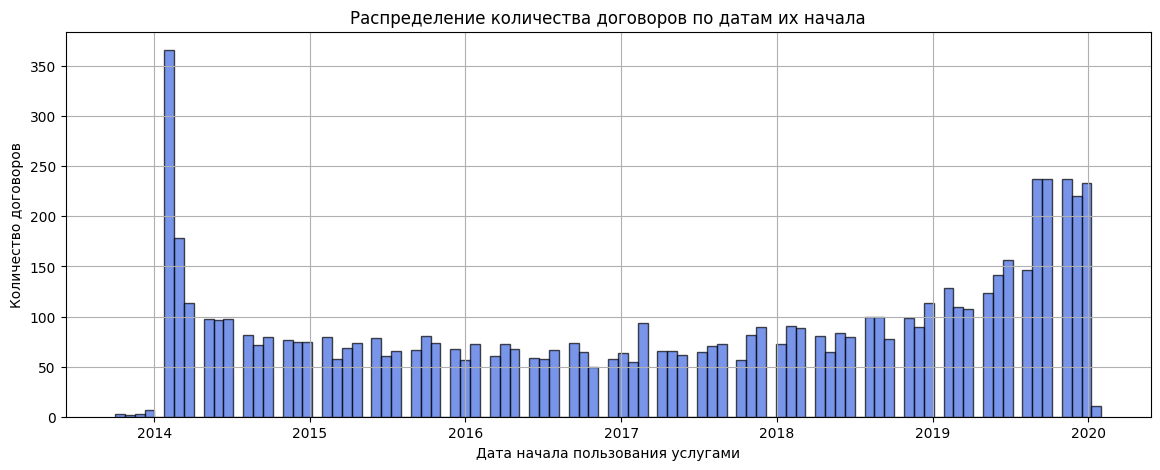

In [73]:
data['begin_date'].hist(figsize=(14, 5), bins=100, alpha=0.7,
                        color='royalblue', edgecolor='black')
plt.grid(True)
plt.xlabel('Дата начала пользования услугами')
plt.ylabel('Количество договоров')
plt.title('Распределение количества договоров по датам их начала')
plt.show()

Начиная с середины 2018 года, видимо, проводятся компании по привлечению клиентов к заключению договоров.

#### Дата окончания пользования услугами
<a name="472"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

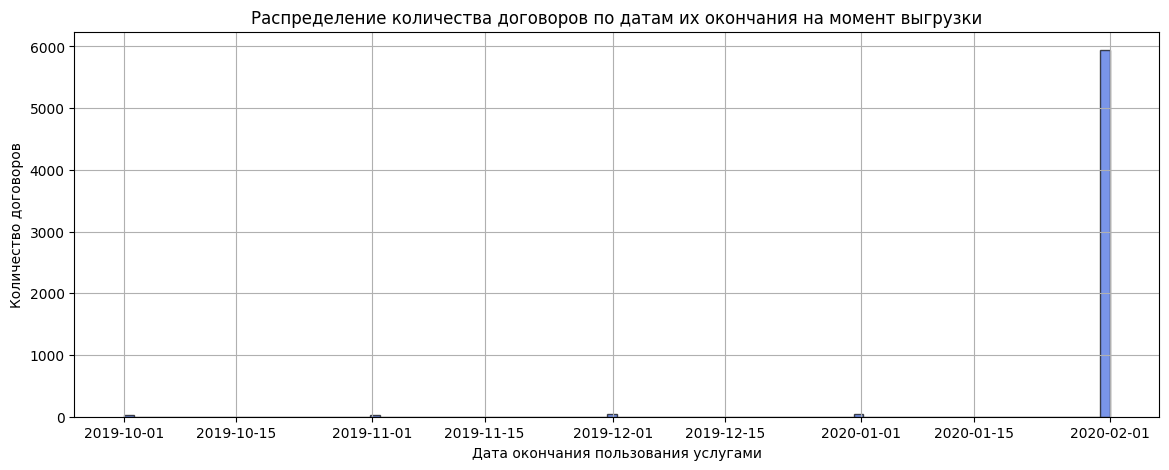

In [74]:
data['end_date'].hist(figsize=(14, 5), bins=100, alpha=0.7,
                      color='royalblue', edgecolor='black', range=['2019-10-01', '2020-02-01'])
plt.grid(True)
plt.xlabel('Дата окончания пользования услугами')
plt.ylabel('Количество договоров')
plt.title('Распределение количества договоров по датам '
          'их окончания на момент выгрузки')
plt.show()

Исходя из первоначальной выборки `contract`, даты окончания пользования услугами приходятся на первое число каждого месяца [(`contract['EndDate'].unique())`](#month_unique). Количество расторгнутых договоров в эти месяца остаётся примерно одним и тем же. Действующие договора на момент выгрузки мы заменили на дату 1 февраля 2020 года. Поэтому пик в феврале не информативен.

Мы можем убедиться в этом, если выберем диапазон дат без пика и посмотрим на значения количества расторгнутых договоров детальнее.

<a name="график"></a>

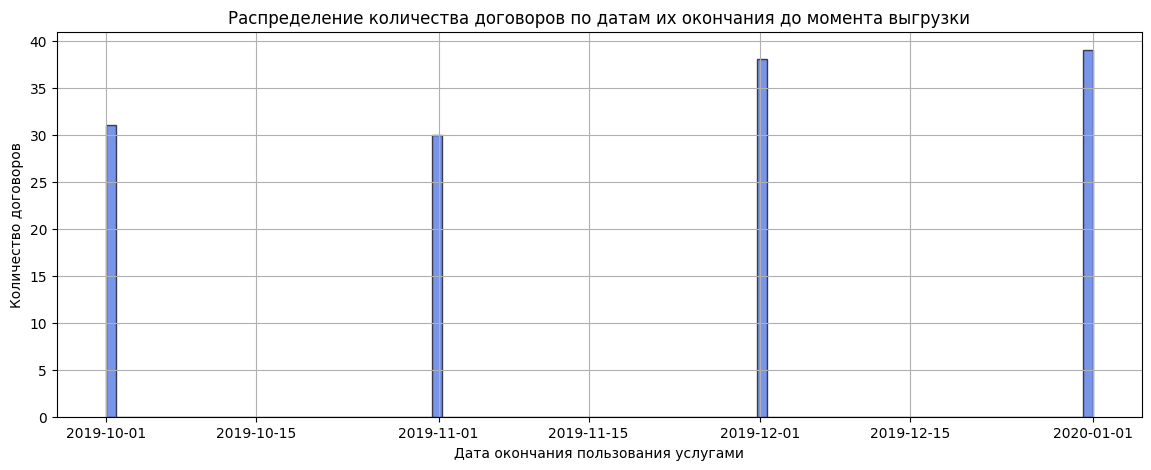

In [75]:
data['end_date'].hist(
    figsize=(14, 5), bins=100, alpha=0.7, color='royalblue',\
    edgecolor='black', range=['2019-10-01', '2020-01-01'])
plt.grid(True)
plt.xlabel('Дата окончания пользования услугами')
plt.ylabel('Количество договоров')
plt.title('Распределение количества договоров по датам '
          'их окончания до момента выгрузки')
plt.show()

Из распределения на графике видно, что оператор связи обоснованно поставил цель удержания клиентов. Т.к. с декабря 2019 года наблюдается повышение оттока клиентов.

#### Длительность договора
<a name="473"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

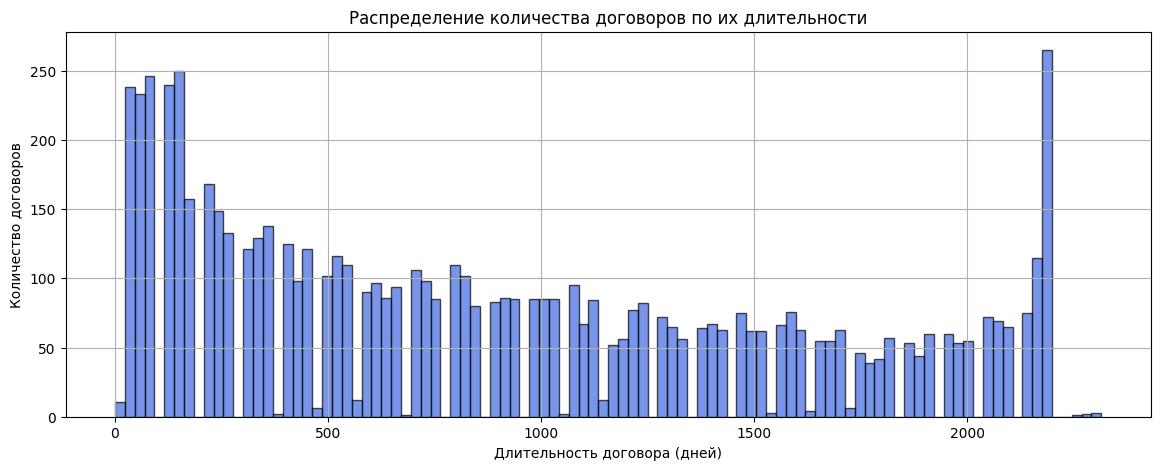

In [76]:
data['duration'].hist(figsize=(14, 5), bins=100, alpha=0.7,
                      color='royalblue', edgecolor='black')
plt.grid(True)
plt.xlabel('Длительность договора (дней)')
plt.ylabel('Количество договоров')
plt.title('Распределение количества договоров по их длительности')
plt.show()

Т.к. признак `duration` выведен из разности признаков `end_date` и `begin_date`, появление пика на самых длительных договорах для `duration` объясняется аналогично пику для `end_date`. Действующие договора на момент выгрузки мы заменили на дату 1 февраля 2020 года. При более детальном рассмотрении видно, что по этой причине длительность договоров на графике справа постепенно растёт с шагом в один месяц (30 дней), как и даты заключения договоров в признаке `begin_date` (убедимся в этом на более детальном графике ниже). Поэтому пик справа не информативен.

In [77]:
data['duration'].describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration, dtype: float64

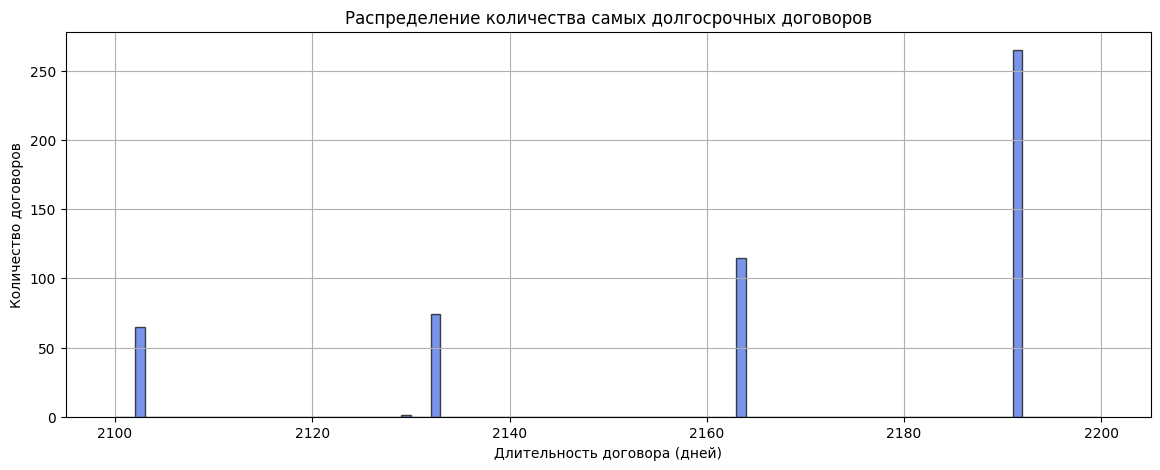

In [78]:
data['duration'].hist(figsize=(14, 5), bins=100, alpha=0.7,
                      color='royalblue', edgecolor='black', range=(2100, 2200))
plt.grid(True)
plt.xlabel('Длительность договора (дней)')
plt.ylabel('Количество договоров')
plt.title('Распределение количества самых долгосрочных договоров')
plt.show()

Рассмотрим более детально пик слева графика.

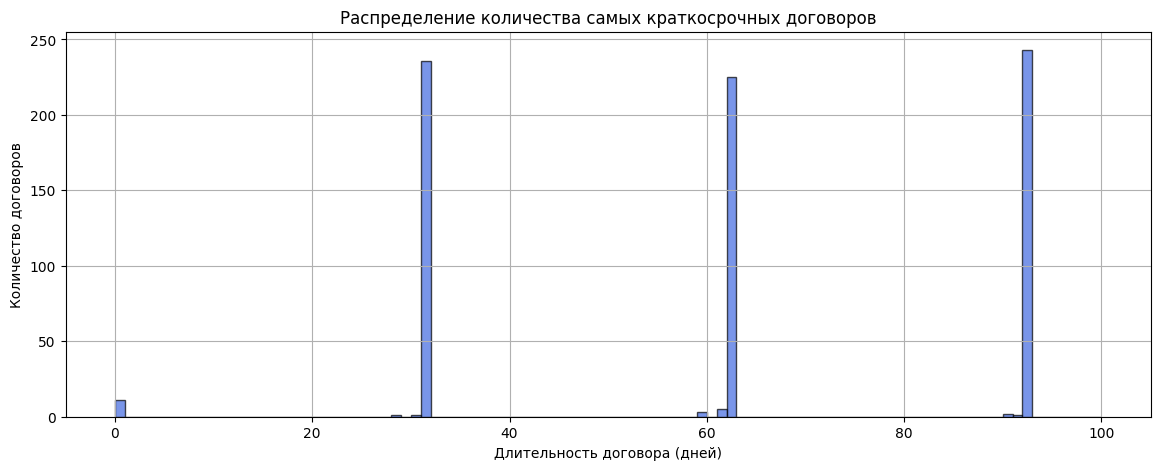

In [79]:
data['duration'].hist(figsize=(14, 5), bins=100, alpha=0.7,
                      color='royalblue', edgecolor='black', range=(0, 100))
plt.grid(True)
plt.xlabel('Длительность договора (дней)')
plt.ylabel('Количество договоров')
plt.title('Распределение количества самых краткосрочных договоров')
plt.show()

Почти 250 клиентов (два столбца суммарно) отказались от услуг оператора связи уже в первый месяц пользования услугами. Исходя из распределения количества договоров в краткосрочной зоне, можно сделать вывод, что основной вклад в отток клиентов делают именно договора, заключённые недавно. Это и сподвигло оператора связи провести исследование с целью выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия для удержания клиентов.

#### Ежемесячные траты на услуги
<a name="474"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

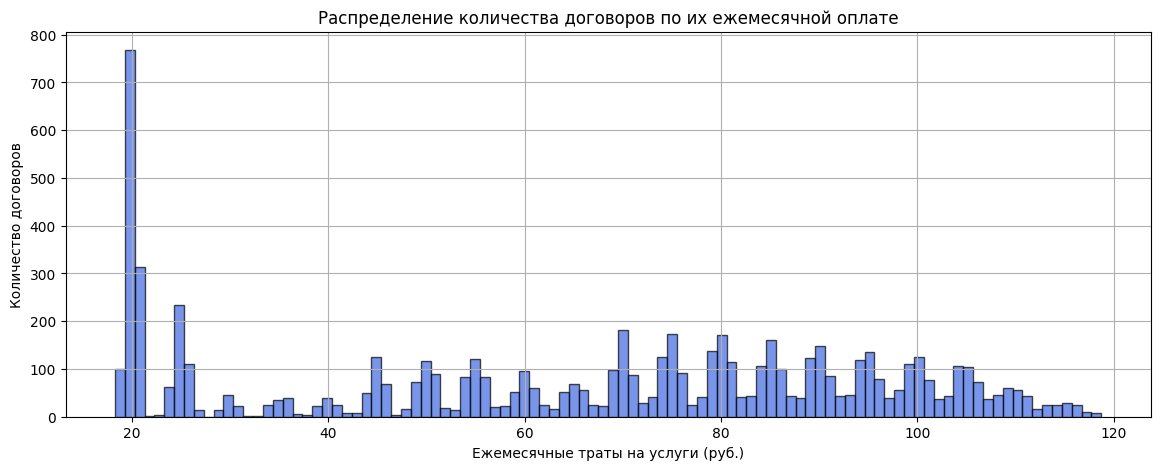

In [80]:
data['monthly_charges'].hist(
    figsize=(14, 5), bins=100, alpha=0.7, color='royalblue', edgecolor='black')
plt.grid(True)
plt.title('Распределение количества договоров по их ежемесячной оплате')
plt.xlabel('Ежемесячные траты на услуги (руб.)')
plt.ylabel('Количество договоров')
plt.show()

Посмотрим, какие услуги вносят основной вклад в пики на графике. Т.к. интернет-услуг много, проще посмотреть на единственной услуге телефонии - признак `multiple_lines`.

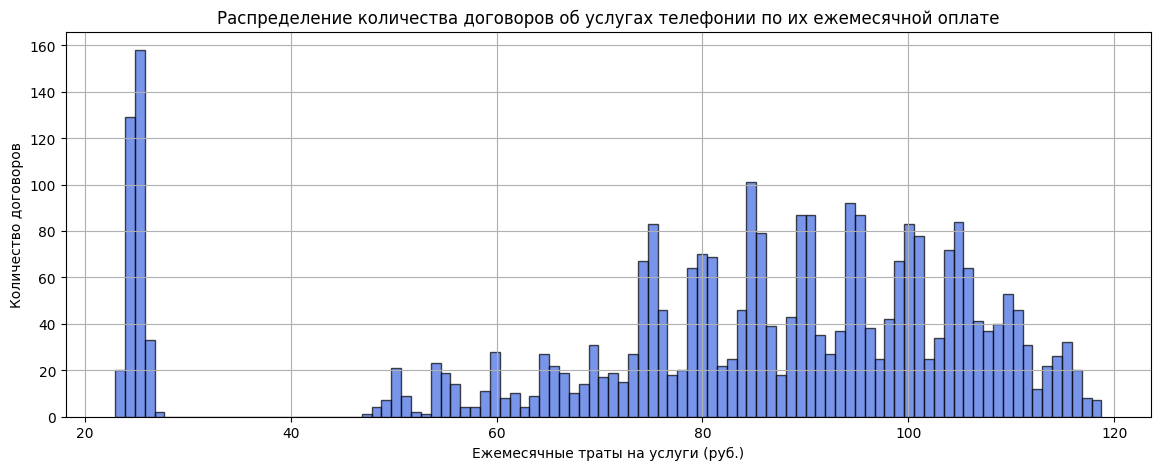

In [81]:
(data.loc[data['multiple_lines'] == 'Yes', 'monthly_charges']).hist(
    figsize=(14, 5), bins=100, alpha=0.7, color='royalblue', edgecolor='black')
plt.grid(True)
plt.title('Распределение количества договоров об услугах телефонии '
          'по их ежемесячной оплате')
plt.xlabel('Ежемесячные траты на услуги (руб.)')
plt.ylabel('Количество договоров')
plt.show()

Мы видим, что основной вклад в левом пике дают интернет-услуги, а  в диапазоне от 50 до 120 рублей поровну с телефонией. Также это говорит о том, что ежемесячные услуги телефонии, в целом, стоят дороже, чем интернет-услуги.

#### Суммарные траты на услуги
<a name="475"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

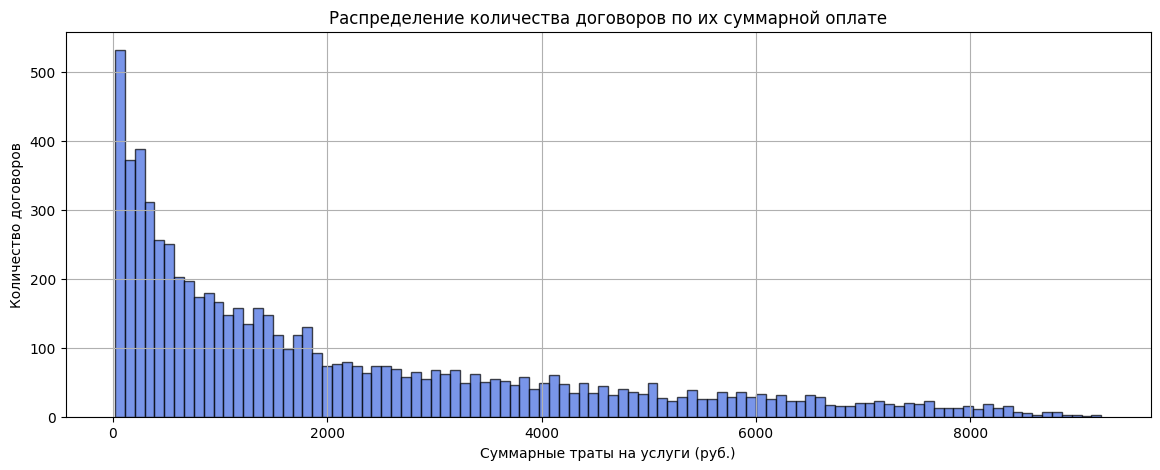

In [82]:
data['total_charges'].hist(
    figsize=(14, 5), bins=100, alpha=0.7, color='royalblue', edgecolor='black')
plt.grid(True)
plt.title('Распределение количества договоров по их суммарной оплате')
plt.xlabel('Суммарные траты на услуги (руб.)')
plt.ylabel('Количество договоров')
plt.show()

И аналогично посмотрим, какие услуги вносят основной вклад в пик на графике.

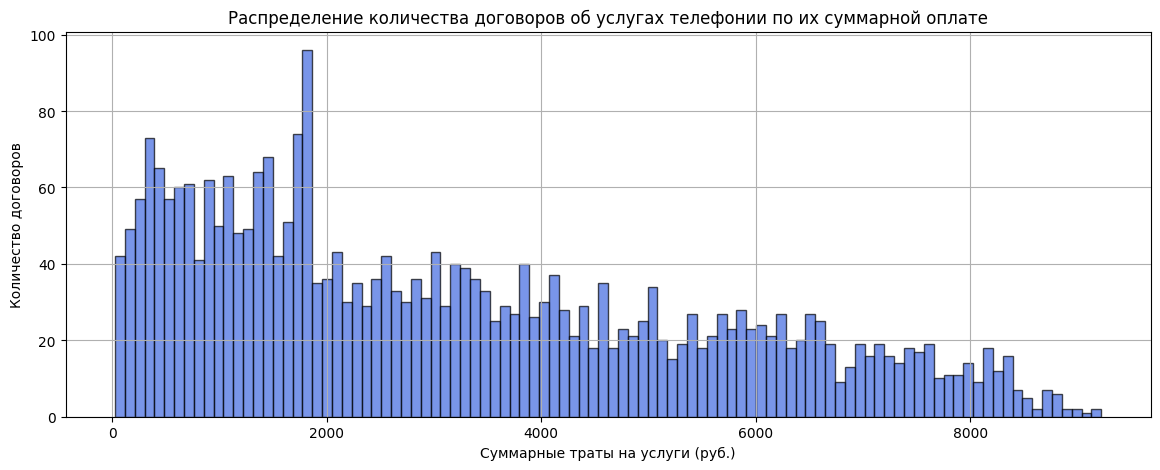

In [83]:
(data.loc[data['multiple_lines'] == 'Yes', 'total_charges']).hist(
    figsize=(14, 5), bins=100, alpha=0.7, color='royalblue', edgecolor='black')
plt.grid(True)
plt.title('Распределение количества договоров об услугах телефонии '
          'по их суммарной оплате')
plt.xlabel('Суммарные траты на услуги (руб.)')
plt.ylabel('Количество договоров')
plt.show()

Очевидно, что суммарно основной вклад в услуги низкой ценовой категории вносят интернет-услуги, а более высокой ценовой категории - услуги телефонии.

#### Проверка на мультиколлинеарность
<a name="476"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём проверку признаков на мультиколлинеарность и корреляцию с таргетом.

Обращаем внимание на то, что корреляция Пирсона/Спирмена – только для численных признаков, для категориальных – *phi_k*, *VIF*, *Cramer’s V*.

Построим тепловую карту (хитмэп) корреляций Пирсона для численных признаков.

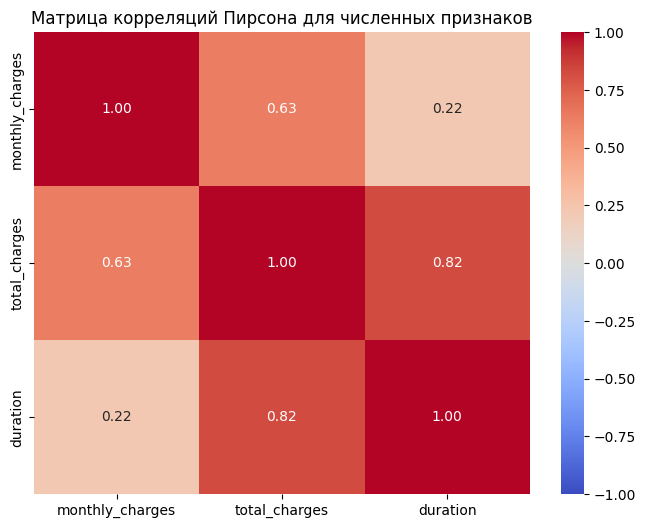

In [84]:
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(
    data[numeric].corr(),\
    annot=True, fmt = '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Матрица корреляций Пирсона для численных признаков')
plt.show()

Видна сильная корреляция между признаками `total_charges` и `duration`.

#### Вывод по п. 4.7
<a name="477"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Исследование численных признаков**](#Исследование-численных-признаков) были исследованы следующие численные признаки:
- дата начала пользования услугами;
- дата окончания пользования услугами;
- длительность договора;
- ежемесячные траты на услуги;
- суммарные траты на услуги,

а также была проведена проверка на их мультиколлинеарность.

В результате выполнения задач этого подраздела было выявлено следующее:
- Начиная с середины 2018 года проводятся компании по привлечению клиентов к заключению договоров.
- Из [распределения на графике](#Дата-окончания-пользования-услугами) видно, что оператор связи обоснованно поставил цель удержания клиентов. Т.к. с декабря 2019 года наблюдается отток клиентов.
- Около 250 клиентов отказались от услуг оператора связи уже в первый месяц пользования услугами. Исходя из распределения количества договоров в краткосрочной зоне, можно сделать вывод, что основной вклад в отток клиентов делают именно договора, заключённые недавно. Это и сподвигло оператора связи провести исследование с целью выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия для удержания клиентов.
- Основной ежемесячный вклад в сегмент с самой низкой стоимостью дают интернет-услуги, а в диапазоне от 50 до 120 рублей - поровну с телефонией. Также это говорит о том, что ежемесячные услуги телефонии, в целом, стоят дороже, чем интернет-услуги.
- Суммарно основной вклад в услуги низкой ценовой категории вносят интернет-услуги, а более высокой ценовой категории - услуги телефонии.
- Сильная корреляция наблюдается между признаками `total_charges` и `duration`.

### Исследование категориальных признаков
<a name="48"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Для категориальных признаков, включая таргет, можно посмотреть их состав.

#### Распределение категориальных признаков
<a name="481"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

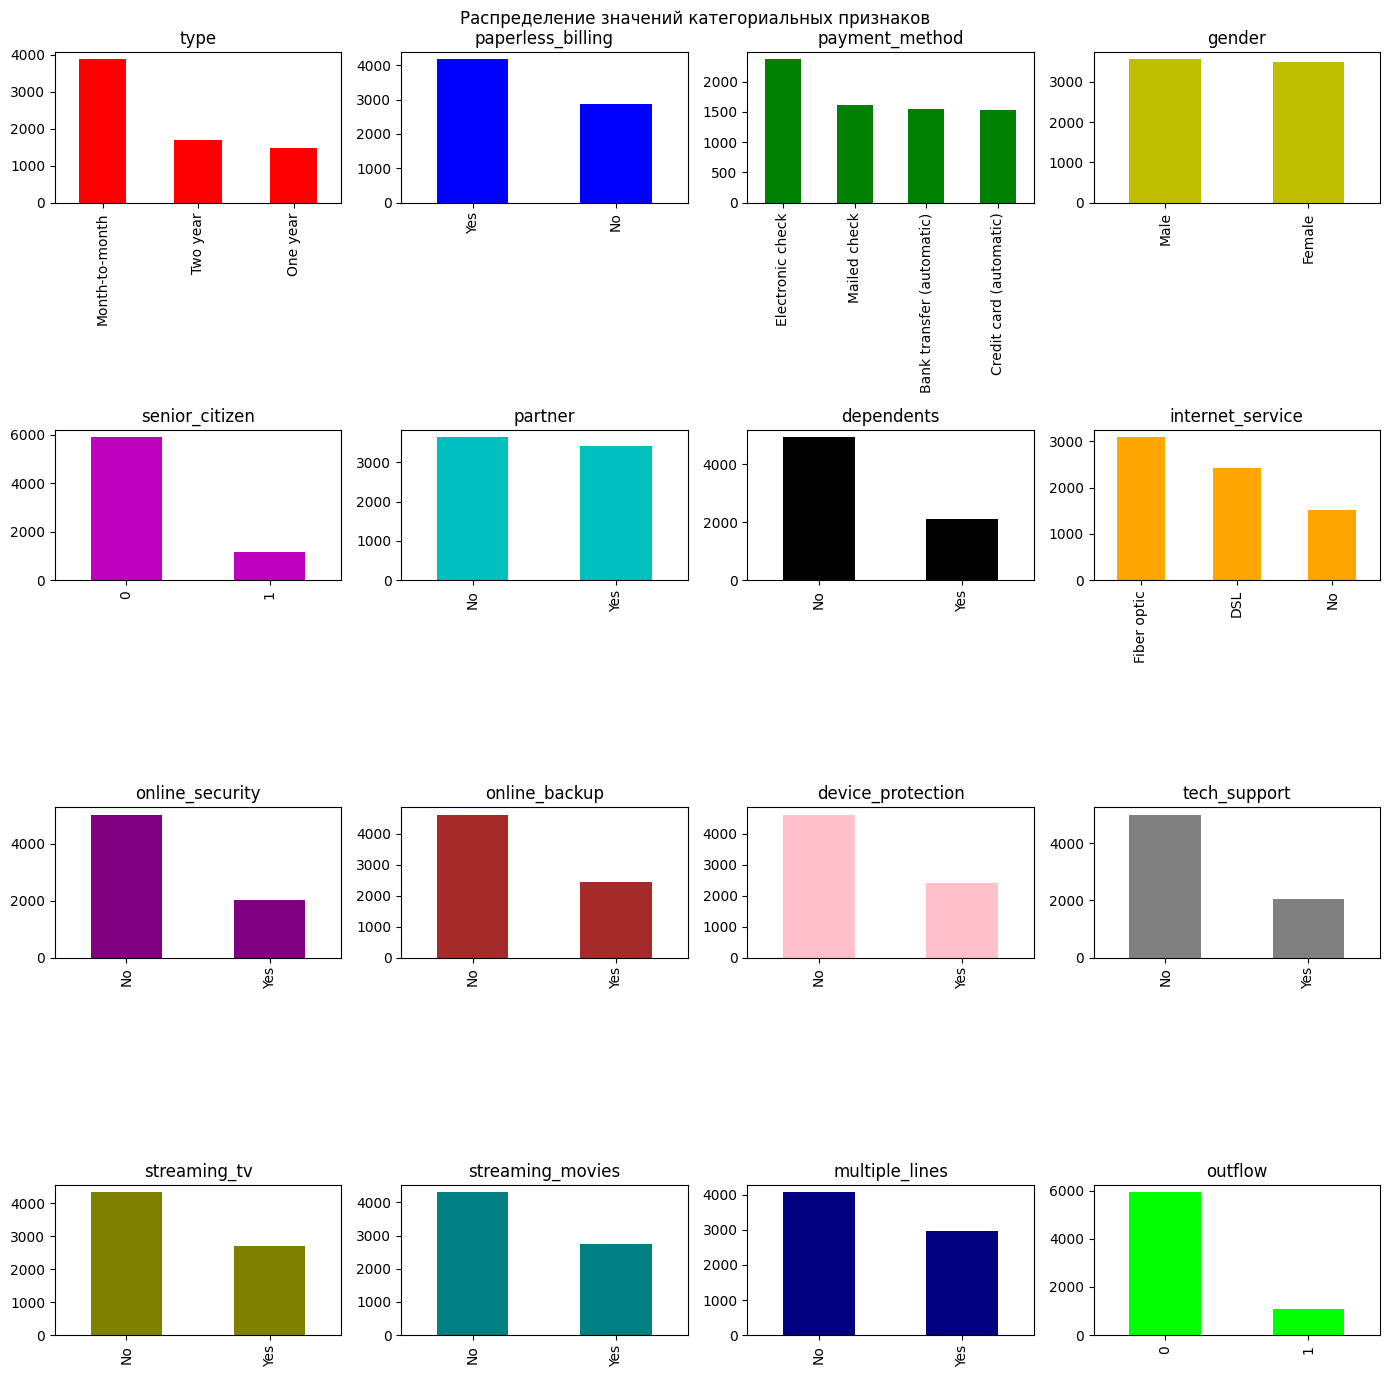

In [85]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14), dpi=100)

fig.suptitle('Распределение значений категориальных признаков')

axes = axs.ravel()
colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple',\
          'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime']

for i, column in enumerate(categorical):
    data[column].value_counts().plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

У большинства признаков разный состав классов.

В признаках преобладают следующие классы:
- ежемесячный тип оплаты ("Month-to-month" в признаке `type`);
- электронный платёжный документ ("Yes" в признаке `paperless_billing`);
- оплата с электронным чеком ("Electronic check" в признаке `payment_method`);
- отсутствие пенсионного статуса по возрасту ("No" в признаке `senior_citizen`);
- отсутствие иждивенцев ("No" в признаке `dependents`);
- оптоволоконный интернет ("Fiber optic" в признаке `internet_service`);
- отсутствие блокировки небезопасных сайтов ("No" в признаке `online_security`);
- отсутствие облачного хранилища файлов для резервного копирования данных ("No" в признаке `online_backup`);
- отсутствие антивируса ("No" в признаке `device_protection`);
- отсутствие выделенной линии технической поддержки ("No" в признаке `tech_support`);
- отсутствие стримингового телевидения ("No" в признаке `streaming_tv`);
- отсутствие каталога фильмов ("No" в признаке `streaming_movies`);
- отсутствие наличия возможности ведения параллельных линий во время звонка ("No" в признаке `multiple_lines`);
- большинство клиентов сохраняет договор с оператором связи ("No" в признаке `outflow`).

Нет преобладания какого-либо из классов у признаков:
- пол ("Yes" и "No" в признаке `gender`);
- наличие супруга(и) ("Yes" и "No" в признаке `partner`).

Датасет `data` не сбалансирован в таргете `outflow`.

In [86]:
data['outflow'].value_counts()

0    5942
1    1101
Name: outflow, dtype: int64

Состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 6 раза меньше, чем оставшихся.

Т.к. для обучения моделей мы будем использовать кросс-валидацию, то из-за риска утечки данных апсемплинг (увеличение количества значений в классе) использовать нельзя.

К тому же, в качестве метрики мы будем использовать *AUC-ROC*, которая не чувствительна к дисбалансу классов.

#### Проверка на мультиколлинеарность
<a name="482"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим *Phi_K*-корреляцию для всех признаков - численных и категориальных.

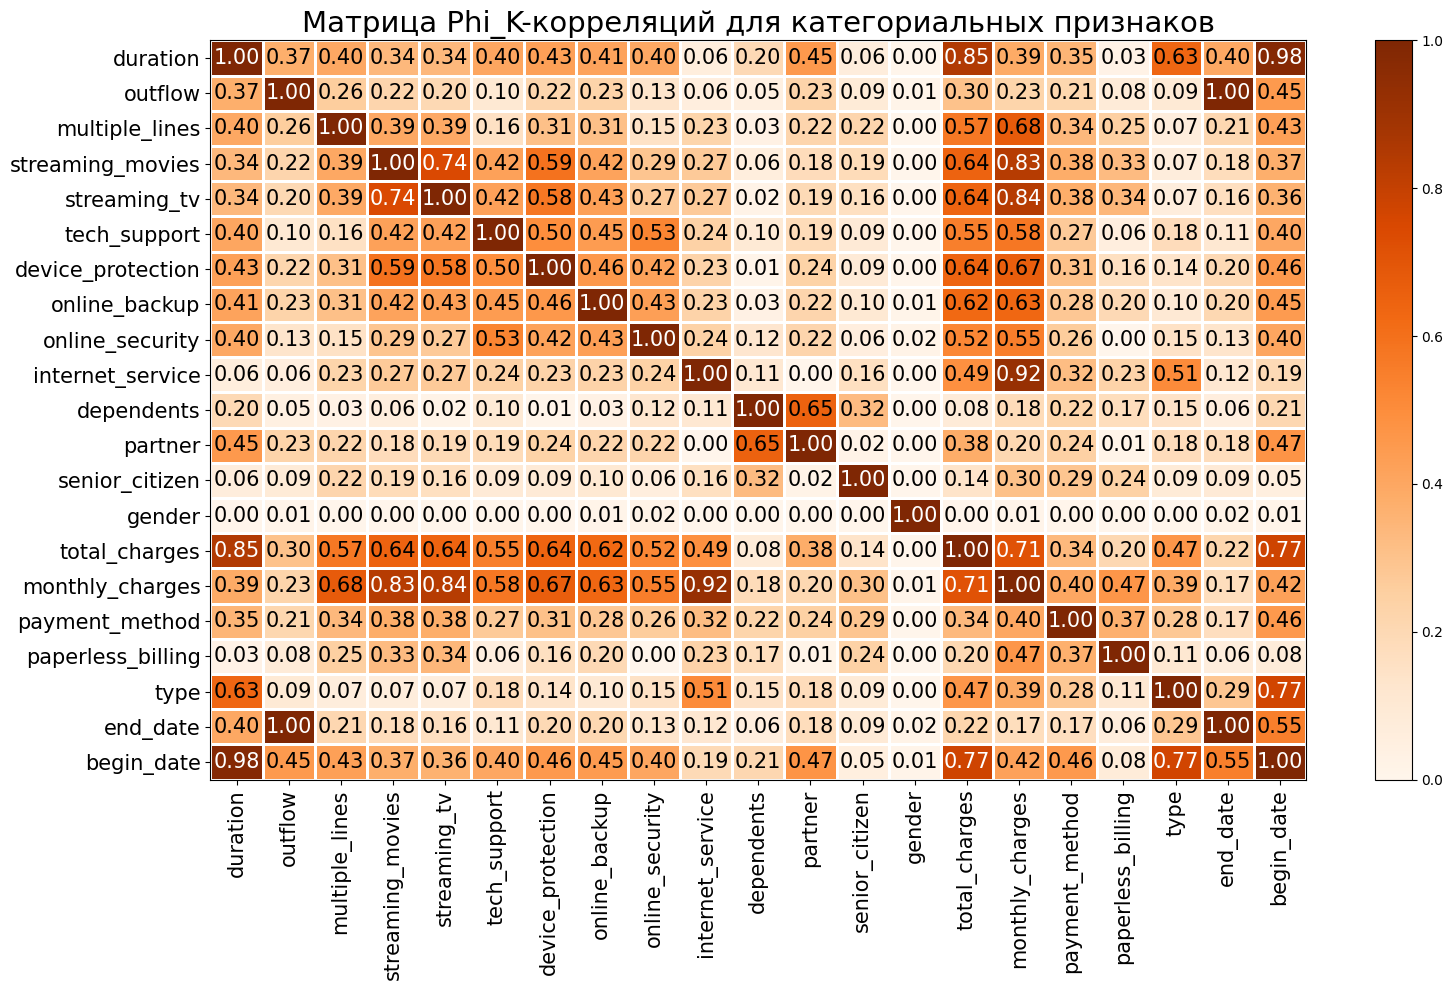

In [87]:
# Исключим неподходящие признаки
unsuitable_features = ['begin_date', 'end_date']
numeric_features = [col for col in numeric if col not in unsuitable_features]

# вычислим корреляционную матрицу Phi_K
corr_matrix = data.phik_matrix(interval_cols=numeric_features)

# построим корреляционную матрицу
plot_correlation_matrix(corr_matrix.values,
                        x_labels=corr_matrix.columns,
                        y_labels=corr_matrix.index,
                        vmin=0, vmax=1, color_map="Oranges",
                        title="Матрица Phi_K-корреляций для категориальных признаков",
                        fontsize_factor=1.5,
                        figsize=(16, 10))
plt.tight_layout()
plt.show()

Матрица показывает, что у признака `duration` имеется высокая корреляция (> 0.8) с признаками `total_charges` и `begin_date`, а корреляция между признаками `end_date` и `outflow` равна "1", т.к. `end_date` мы заменили на `outflow`.

Построим парные графики корреляций численных признаков с таргетом.

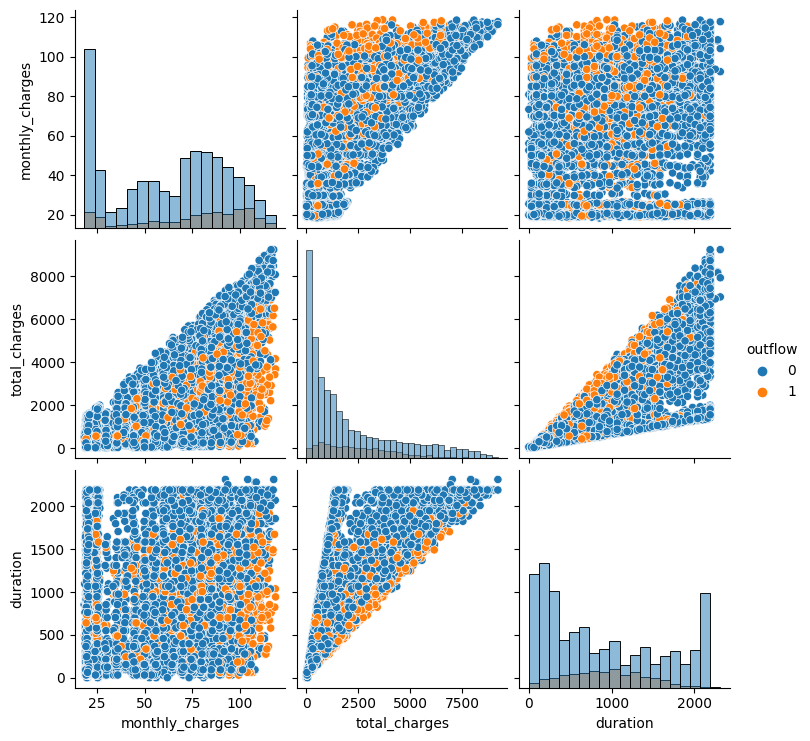

In [88]:
sns.pairplot(data,
             vars = numeric,
             hue ='outflow', diag_kind = 'hist');

Парные графики корреляций показывают высокую мультиколлинеарность между признаками `duration` и `total_charges`, а также между `monthly_charges` и `total_charges`.

#### Вывод по п. 4.8
<a name="483"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Исследование категориальных признаков**](#Исследование-категориальных-признаков) были исследованы следующие категориальные признаки:
- визуализировано распределение категориальных признаков;
- проведена проверка на мультиколлинеарность.

В результате выполнения задач этого подраздела было выявлено следующее:
- Датасет не сбалансирован в таргете `outflow`.
- У 14 из 16 категориальных признаков присутствует преобладание какого-либо из классов.
- Состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 6 раза меньше, чем оставшихся.
- В качестве бизнес-метрики в этой задаче мы будем использовать *AUC-ROC*, которая не чувствительна к дисбалансу классов.
- Матрица показывает, что у признака `duration` имеется высокая корреляция (> 0.8) с признаками `total_charges` и `begin_date`, а корреляция между признаками `end_date` и `outflow` равна "1", т.к. `end_date` мы заменили на `outflow`.
- Парные графики корреляций показывают высокую мультиколлинеарность между признаками `duration` и `total_charges`, а также между `monthly_charges` и `total_charges`.

### Удаление мультиколлинеарных признаков
<a name="49"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

При корреляции > 0.8 один из признаков можно удалить.

Мультиколлинеарные признаки стоит удалять для линейных моделей. В логистической регрессии от `sklearn` заложена регуляризация, поэтому для нее мультиколлинеарность не страшна, как и для деревянных и бустинговых моделей. Мультиколлинеарность может повлиять на важность признаков, и, как следствие - интерпретируемость модели. Поэтому решение об удалении зависит от поставленной задачи. В целом, если удаление признака не приведет к явному ухудшению модели, то его можно удалить.

Удалим признаки, у которых имеется высокая корреляция с `duration`:
- `begin_date`
- `total_charges`

Также удалим `end_date`, т.к. этот признак мы заменили на `outflow`.

In [89]:
data.shape

(7043, 21)

In [90]:
data = data.drop(['begin_date', 'end_date', 'total_charges'], axis=1)
data.shape

(7043, 18)

Построим *Phi_K*-корреляцию для всех признаков повторно.

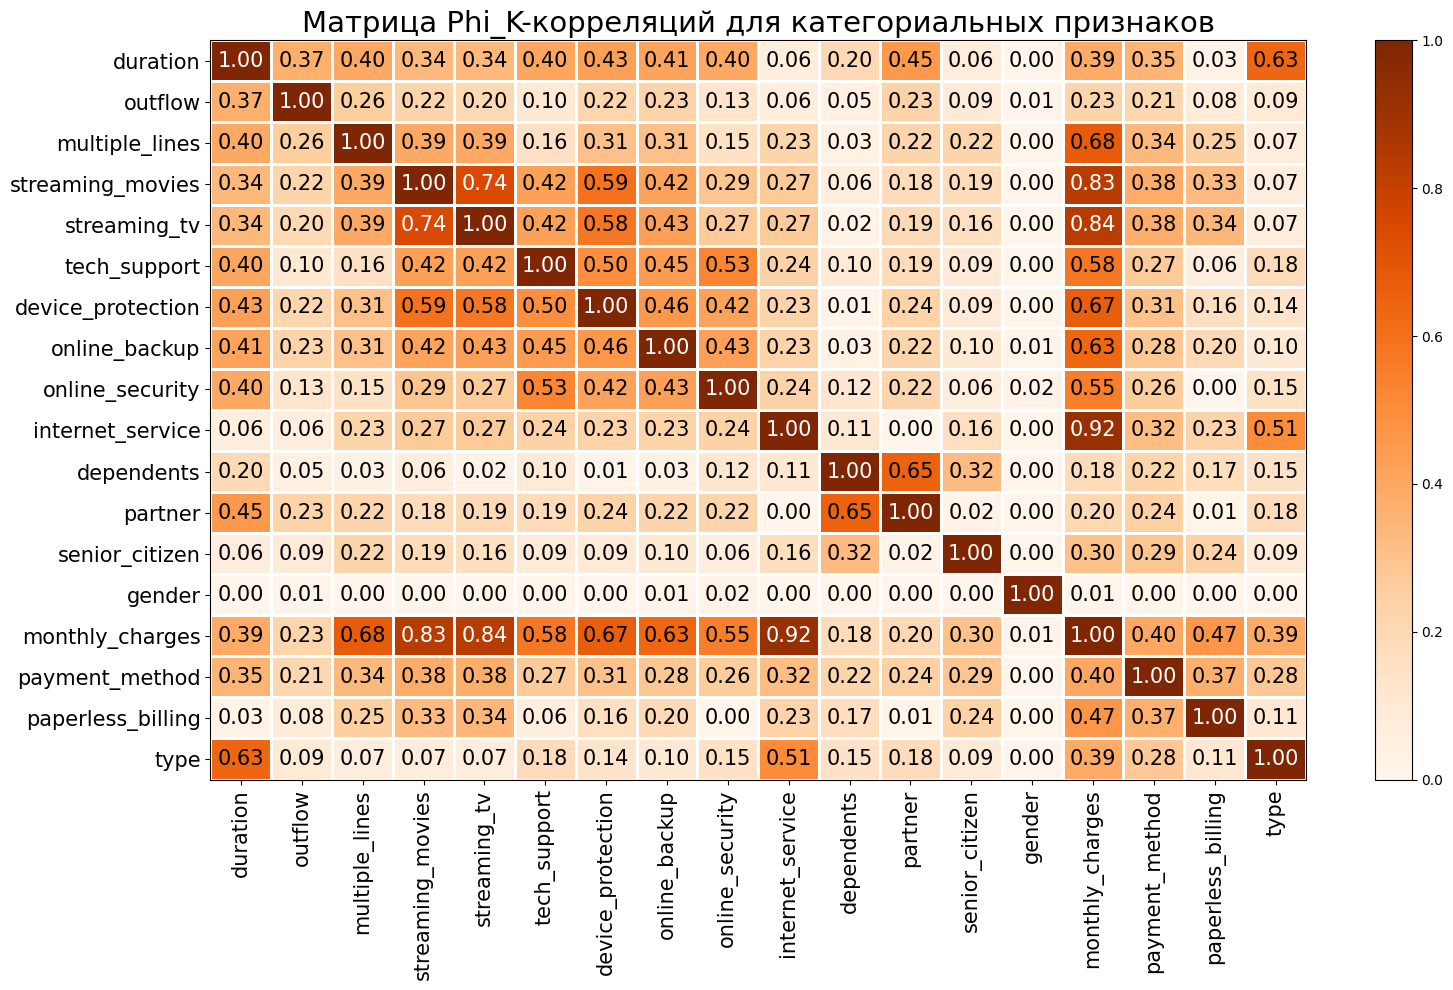

In [91]:
# вычислим корреляционную матрицу Phi_K
corr_matrix_2 = data.phik_matrix(interval_cols=numeric_features)

# построим корреляционную матрицу
plot_correlation_matrix(corr_matrix_2.values,
                        x_labels=corr_matrix_2.columns,
                        y_labels=corr_matrix_2.index,
                        vmin=0, vmax=1, color_map="Oranges",
                        title="Матрица Phi_K-корреляций для категориальных признаков",
                        fontsize_factor=1.5,
                        figsize=(16, 10))
plt.tight_layout()
plt.show()

Мультиколлинеарность признаков устранена.

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   gender             7043 non-null   object 
 5   senior_citizen     7043 non-null   object 
 6   partner            7043 non-null   object 
 7   dependents         7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  outflow       

В датасете осталось два численных признака - `monthly_charge` и `duration`. Остальные имеют тип `object`.

### Вывод
<a name="410"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Анализ данных и подготовка признаков**](#Анализ-данных-и-подготовка-признаков) были выполнены следующие задачи:
1. Выборки объединены.
2. Признаки добавлены и удалены.
3. Признаки переименованы.
4. Пропуски заполнены.
5. Типы данных изменены.
6. Признаки преобразованы.
7. Исследованы численные признаки:
   - дата начала пользования услугами;
   - дата окончания пользования услугами;
   - длительность договора;
   - ежемесячные траты на услуги;
   - суммарные траты на услуги.
   - проверка на мультиколлинеарность
8. Исследованы категориальные признаки:
   - распределение категориальных признаков;
   - проверка на мультиколлинеарность.
9. Удалены мультиколлинеарные признаки.

В результате выполнения задач этого раздела было выявлено следующее:
- Из распределения на графике видно, что оператор связи обоснованно поставил цель удержания клиентов. Т.к. с октября 2019 года наблюдается отток клиентов.
- В результате исследовательского анализа был выявлен дисбаланс классов у большинства категориальных признаков. В качестве основной метрики мы будем использовать *AUC-ROC*, которая не чувствительна к дисбалансу классов.
- В результате исследовательского анализа было выявлено наличие мультиколлинеарных признаков. Мультиколлинеарные признаки необходимо удалять для линейных моделей. В логистической регрессии от `sklearn` заложена регуляризация, поэтому для нее мультиколлинеарность не страшна, как и для деревянных и бустинговых моделей. Но мультиколлинеарность может повлиять на важность признаков, и, как следствие - интерпретируемость модели. Поэтому решение об удалении зависит от поставленной задачи. В целом если удаление признака не приведет к явному ухудшению модели, то можно удалить. По этой причине признаки `end_date`, `begin_date` и `total_charges` были удалены.

## Подготовка к обучению
<a name="5"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Разделение данных на выборки
<a name="51"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выделим из датасета целевой признак - `y`, остальные признаки - `X`.

In [93]:
X = data.drop('outflow', axis=1)
y = data['outflow']

Разделим полученые данные на обучающую и тестовую выборки, в пропорции 3 к 1. Для корректного разбиения датасета применим аргумент `stratify`.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [95]:
print('Размеры выборок:')
print(f'train: {len(X_train)} - {len(X_train)/len(data):.0%}')
print(f'test: {len(X_test)} - {len(X_test)/len(data):.0%}')

Размеры выборок:
train: 5282 - 75%
test: 1761 - 25%


Сбросим индексы, это понадобится нам для последующего кодирования.

In [96]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Кодирование категориальных признаков
<a name="52"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Так как модели логистической регрессии `LogisticRegression`, случайного леса `RandomForestClassifier` и градиентного бустинга `LGBMClassifier` не распознают тип данных `object`, для их применения необходимо преобразовать категориальные признаки в численные.

Посмотрим, какие категориальные признаки нужно преобразовать в численные.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   gender             7043 non-null   object 
 5   senior_citizen     7043 non-null   object 
 6   partner            7043 non-null   object 
 7   dependents         7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  outflow       

С помощью техники прямого кодирования (*One-Hot Encoding, OHE*) преобразуем категориальные признаки в численные. Для этого мы применим к данным функцию `OneHotEncoder()`.

Но сначала сохраним список всех категориальных признаков, кроме таргета `outflow`, в переменной `categorical_2`.

In [98]:
categorical_2 = list(X_train.loc[:, data.dtypes == 'object'].columns.values)
categorical_2

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [99]:
# создадим копии выборок,
# для последующего кодирования категориальных признаков
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

# создадим объект класса OneHotEncoder(),
# параметр sparse=False вернет массив (sparse=True - сжатую матрицу)
encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')

# Применим функцию fit_transform() для обучающей выборки:
# создадим датафрейм с закодированными категориальными признаками categorical_2
encoded_train = pd.DataFrame(encoder.fit_transform(X_train_ohe[categorical_2]))
# используем вывод метода .get_feature_names_out(),
# чтобы добавить названия признаков
encoded_train.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_train к исходному датафрейму, удалив categorical_2
X_train_ohe = X_train_ohe.join(encoded_train)
X_train_ohe.drop(categorical_2, axis = 1, inplace = True)

# Применим функцию transform() для тестовой выборки:
# создадим датафрейм с закодированными категориальными признаками categorical_2
encoded_test = pd.DataFrame(encoder.transform(X_test_ohe[categorical_2]))
# используем вывод метода .get_feature_names_out(),
# чтобы добавить названия признаков
encoded_test.columns = encoder.get_feature_names_out()

# присоединим датафрейм encoded_test к исходному датафрейму, удалив categorical_2
X_test_ohe = X_test_ohe.join(encoded_test)
X_test_ohe.drop(categorical_2, axis = 1, inplace = True)

display("Выборка 'train'", X_train_ohe.head())
print(X_train_ohe.shape)
display("Выборка 'test'", X_test_ohe.head())
print(X_test_ohe.shape)

"Выборка 'train'"

,monthly_charges,duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,24.95,1401,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,104.60,671,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,19.70,1676,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.10,853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,19.45,2163,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5282, 21)


"Выборка 'test'"

,monthly_charges,duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,50.70,334,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,70.40,92,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.30,396,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35.05,153,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,95.25,457,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


(1761, 21)


<!-- Прямое кодирование можно выполить и с помощью функции `.get_dummies()` с аргументом `drop_first=True`, чтобы избежать дамми-ловушки. -->

### Масштабирование численных признаков
<a name="53"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

#### Для моделей `LogisticRegression`, `RandomForestClassifier` и `LGBMClassifier`
<a name="531"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Масштабируем численные признаки **для моделей логистической регрессии `LogisticRegression`, случайного леса `RandomForestClassifier` и градиентного бустинга `LGBMClassifier`**, используя данные с **кодированными** категориальными признаками. Для этого мы стандартизируем данные с помощью класса `StandardScaler()`.

Сначала, в переменной `numeric_2` сохраним список всех численных признаков, оставшихся после кодирования категориальных признаков. После кодирования - все признаки стали численными, поэтому можем указать названия всех признаков каждой из выборок.

In [100]:
numeric_2 = X_train_ohe.columns
numeric_2

Index(['monthly_charges', 'duration', 'type_One year', 'type_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'multiple_lines_Yes'],
      dtype='object')

In [101]:
# создадим копии выборок,
# для последующего масштабирования численных признаков
X_train_ohe_scaler = X_train_ohe.copy()
X_test_ohe_scaler = X_test_ohe.copy()

# добавим данную строку,
#чтобы не появлялось предупреждение 'SettingWithCopy'
pd.options.mode.chained_assignment = None

# создадим объект класса StandardScaler()
scaler = StandardScaler()

# настроим объект на обучающих данных
# (настройка - это вычисление среднего и дисперсии)
scaler.fit(X_train_ohe_scaler[numeric_2])

# преобразуем обучающую выборку функцией transform(),
# (т.е. нормируем значения признаков -
# все значения становятся в диапазоне от 0 до 1)
X_train_ohe_scaler[numeric_2] = scaler.transform(X_train_ohe_scaler[numeric_2])

# преобразуем тестовую выборку функцией transform()
X_test_ohe_scaler[numeric_2] = scaler.transform(X_test_ohe_scaler[numeric_2])

display("Выборка 'train'", X_train_ohe_scaler.head())
print(X_train_ohe_scaler.shape)
display("Выборка 'test'", X_test_ohe_scaler.head())
print(X_test_ohe_scaler.shape)

"Выборка 'train'"

,monthly_charges,duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,-1.316523,0.725761,1.943134,-0.561462,-1.207430,-0.521688,-0.712032,1.848347,-1.012574,-0.441308,...,1.528628,-0.885017,1.892378,-0.630067,-0.723842,-0.723842,-0.633294,-0.799915,-0.784405,1.168062
1,1.327377,-0.336745,-0.514633,-0.561462,0.828205,-0.521688,1.404431,-0.541024,0.987582,-0.441308,...,-0.654182,1.129922,-0.528436,1.587132,1.381517,-0.723842,1.579046,1.250133,1.274852,-0.856119
2,-1.490791,1.126020,1.943134,-0.561462,-1.207430,-0.521688,1.404431,-0.541024,-1.012574,-0.441308,...,-0.654182,-0.885017,1.892378,-0.630067,-0.723842,-0.723842,-0.633294,-0.799915,-0.784405,-0.856119
3,-0.846828,-0.071847,1.943134,-0.561462,0.828205,-0.521688,1.404431,-0.541024,-1.012574,2.265994,...,1.528628,-0.885017,-0.528436,-0.630067,1.381517,-0.723842,-0.633294,-0.799915,1.274852,-0.856119
4,-1.499090,1.834842,-0.514633,1.781066,-1.207430,-0.521688,-0.712032,1.848347,0.987582,-0.441308,...,1.528628,-0.885017,1.892378,-0.630067,-0.723842,-0.723842,-0.633294,-0.799915,-0.784405,-0.856119


(5282, 21)


"Выборка 'test'"

,monthly_charges,duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,-0.461778,-0.827245,1.943134,-0.561462,0.828205,-0.521688,-0.712032,-0.541024,-1.012574,-0.441308,...,1.528628,-0.885017,-0.528436,1.587132,1.381517,-0.723842,1.579046,-0.799915,1.274852,-0.856119
1,0.192143,-1.179473,-0.514633,-0.561462,-1.207430,-0.521688,1.404431,-0.541024,-1.012574,-0.441308,...,-0.654182,1.129922,-0.528436,-0.630067,-0.723842,-0.723842,-0.633294,-0.799915,-0.784405,-0.856119
2,0.454375,-0.737004,-0.514633,-0.561462,0.828205,1.916856,-0.712032,-0.541024,0.987582,-0.441308,...,1.528628,1.129922,-0.528436,-0.630067,-0.723842,-0.723842,-0.633294,1.250133,-0.784405,-0.856119
3,-0.981264,-1.090688,-0.514633,-0.561462,-1.207430,-0.521688,-0.712032,1.848347,-1.012574,-0.441308,...,-0.654182,-0.885017,-0.528436,-0.630067,-0.723842,-0.723842,-0.633294,-0.799915,1.274852,-0.856119
4,1.017013,-0.648220,-0.514633,-0.561462,0.828205,-0.521688,1.404431,-0.541024,0.987582,2.265994,...,-0.654182,1.129922,-0.528436,-0.630067,-0.723842,-0.723842,-0.633294,1.250133,1.274852,1.168062


(1761, 21)


Проверим типы данных признаков, выведем на экран.

In [102]:
X_train_ohe_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         5282 non-null   float64
 1   duration                                5282 non-null   float64
 2   type_One year                           5282 non-null   float64
 3   type_Two year                           5282 non-null   float64
 4   paperless_billing_Yes                   5282 non-null   float64
 5   payment_method_Credit card (automatic)  5282 non-null   float64
 6   payment_method_Electronic check         5282 non-null   float64
 7   payment_method_Mailed check             5282 non-null   float64
 8   gender_Male                             5282 non-null   float64
 9   senior_citizen_1                        5282 non-null   float64
 10  partner_Yes                             5282 non-null   floa

#### Для модели `CatBoostClassifier`
<a name="532"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Используя данные с **некодированными** категориальными признаками, отдельно масштабируем численные признаки **для модели градиентного бустинга `CatBoostClassifier`**.

*CatBoost* применяет различные техники кодирования категориальных признаков, поэтому дополнительное преобразование категориальных признаков в численные здесь не нужно.

В переменной `numeric_3` сохраним список всех численных признаков без предварительного кодирования категориальных признаков.

In [103]:
numeric_3 = ['duration', 'monthly_charges']

In [104]:
# создадим копии выборок,
# для последующего масштабирования численных признаков
X_train_scaler = X_train.copy()
X_test_scaler = X_test.copy()

# добавим данную строку, чтобы не появлялось предупреждение 'SettingWithCopy'
pd.options.mode.chained_assignment = None

# создадим объект класса StandardScaler()
scaler = StandardScaler()

# настроим объект на обучающих данных
# (настройка — это вычисление среднего и дисперсии)
scaler.fit(X_train_scaler[numeric_3])

# преобразуем обучающую выборку функцией transform(),
# (т.е. нормируем значения признаков -
# все значения становятся в диапазоне от 0 до 1)
X_train_scaler[numeric_3] = scaler.transform(X_train_scaler[numeric_3])

# преобразуем тестовую выборку функцией transform()
X_test_scaler[numeric_3] = scaler.transform(X_test_scaler[numeric_3])

display("Выборка 'train'", X_train_scaler.head())
print(X_train_scaler.shape)
display("Выборка 'test'", X_test_scaler.head())
print(X_test_scaler.shape)

"Выборка 'train'"

,type,paperless_billing,payment_method,monthly_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration
0,One year,No,Mailed check,-1.316523,Female,0,Yes,Yes,No,No,No,No,No,No,No,Yes,0.725761
1,Month-to-month,Yes,Electronic check,1.327377,Male,0,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,No,-0.336745
2,One year,No,Electronic check,-1.490791,Female,0,Yes,No,No,No,No,No,No,No,No,No,1.126020
3,One year,Yes,Electronic check,-0.846828,Female,1,Yes,Yes,DSL,No,Yes,No,No,No,Yes,No,-0.071847
4,Two year,No,Mailed check,-1.499090,Male,0,Yes,Yes,No,No,No,No,No,No,No,No,1.834842


(5282, 17)


"Выборка 'test'"

,type,paperless_billing,payment_method,monthly_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration
0,One year,Yes,Bank transfer (automatic),-0.461778,Female,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,No,-0.827245
1,Month-to-month,No,Electronic check,0.192143,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,-1.179473
2,Month-to-month,Yes,Credit card (automatic),0.454375,Male,0,No,Yes,Fiber optic,No,No,No,No,Yes,No,No,-0.737004
3,Month-to-month,No,Mailed check,-0.981264,Female,0,No,No,DSL,No,No,No,No,No,Yes,No,-1.090688
4,Month-to-month,Yes,Electronic check,1.017013,Male,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Yes,-0.648220


(1761, 17)


Преобразуем тип данных таргета из `object` в `integer`, чтобы при последующем обучении и тестровании моделей не возникло конфликта типов данных.

In [105]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print(y_train.dtype)
print(y_test.dtype)

int64
int64


### Вывод
<a name="54"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Подготовка к обучению**](#Подготовка-к-обучению) были выполнены следующие задачи:
1. Данные разделены на обучающую и тестовую выборки.
2. Выполнено кодирование категориальных признаков с помощью техники прямого кодирования *One-Hot Encoding* (*OHE*).
3. Выполнено масштабирование численных признаков для разных моделей.

## Обучение моделей
<a name="6"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Обучим четыре модели: логистическую регрессию (*Logistic Regression*), случайный лес (*Random Forest*), градиентные бустинги *LightGBM* и *CatBoost* для задачи классификации. Для обучения логистической регрессии используем `Pipeline`, а для последних трёх моделей применим поиск гиперпараметров с помощью функции `GridSearchCV`.

### Функция для обучения моделей
<a name="61"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Напишем функцию `fit_model()`, которая для моделей *Random Forest*, *LightGBM* и *CatBoost* подбирает лучшие параметры с помощью функции `GridSearchCV`, а также выводит метрики *AUC-ROC* и *accuracy*.

Площадь под *ROC*-кривой *AUC-ROC* лучшей модели будет выводиться как `model.best_score_`. Значение метрики *accuracy* будет выводиться из словаря `cv_results_` при помощи нахождения среднего значения в списке с ключом `mean_test_accuracy` - `model.cv_results_['mean_test_accuracy'][best_index]`.

Используем разделение на фолды с помощью *KFold*. Зададим параметры для кроссвалидации: `n_splits` - количество фолдов.

In [106]:
kfold = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

In [107]:
def fit_model(estimator, param_grid, X_train, y_train):
    model = GridSearchCV(estimator=estimator,
                         param_grid=param_grid,
                         error_score='raise',
                         n_jobs=-1,
                         cv=kfold,
                         scoring=['roc_auc', 'accuracy'],
                         refit='roc_auc')

    model.fit(X_train, y_train)

    best_index = model.best_index_
    best_roc_auc = round(model.best_score_, 4)
    best_accuracy = round(model.cv_results_['mean_test_accuracy'][best_index], 4)

    print(f'Best AUC-ROC: {best_roc_auc}')
    print(f'Best accuracy: {best_accuracy}')
    print(f'Best params: {model.best_params_}')

    return model.best_estimator_, best_roc_auc, best_accuracy, print(''),\
    print('Выведем остальные параметры модели:'),\
    print(pd.DataFrame(model.cv_results_).iloc[best_index])

### `LogisticRegression`
<a name="62"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Классифицируем обучающие данные с помощью модели **логистической регрессии *Logistic Regression*** - `LogisticRegression`. Используем `Pipeline` для автоматизации предварительных преобразований данных перед обучением модели.

In [108]:
%%time

lr_estimator = Pipeline([('lr', LogisticRegression(random_state=RANDOM_STATE,
                              class_weight='balanced',
                              solver='lbfgs',
                              max_iter=1000))])

scores = cross_validate(lr_estimator,
                        X_train_ohe_scaler,
                        y_train,
                        scoring=['roc_auc', 'accuracy'],
                        cv=kfold,
                        return_train_score=True)

roc_auc_lr = scores['test_roc_auc'].mean()
accuracy_lr = scores['test_accuracy'].mean()

print('AUC-ROC:', f'{roc_auc_lr:.4f}')
print('Accuracy:', f'{accuracy_lr:.4f}')

AUC-ROC: 0.7523
Accuracy: 0.6912
CPU times: user 250 ms, sys: 171 ms, total: 420 ms
Wall time: 232 ms


Модель логистической регрессии **`LogisticRegression`** на обучающей выборке имеет следующие значения метрик оценки качества:
- ***AUC-ROC = 0.75***
- ***accuracy = 0.69***

### `RandomForestClassifier`
<a name="63"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **случайного леса *Random Forest*** - `RandomForestClassifier`.

In [109]:
%%time

rf_param = {
    # максимальная глубина дерева
    'max_depth': list(range(5, 12, 2)),
    # количество деревьев
    'n_estimators': list(range(50, 121, 10))}

rf_best_model = fit_model(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE,
                                     class_weight='balanced',
                                     n_jobs=-1),
    param_grid=rf_param,
    X_train=X_train_ohe_scaler,
    y_train=y_train)

Best AUC-ROC: 0.8167
Best accuracy: 0.7649
Best params: {'max_depth': 7, 'n_estimators': 60}

Выведем остальные параметры модели:
mean_fit_time                                       0.333724
std_fit_time                                        0.005468
mean_score_time                                     0.074229
std_score_time                                       0.00693
param_max_depth                                            7
param_n_estimators                                        60
params                  {'max_depth': 7, 'n_estimators': 60}
split0_test_roc_auc                                 0.819537
split1_test_roc_auc                                 0.817475
split2_test_roc_auc                                  0.79372
split3_test_roc_auc                                 0.812332
split4_test_roc_auc                                 0.840451
mean_test_roc_auc                                   0.816703
std_test_roc_auc                                    0.014966
rank_test_roc_au

Лучшая модель случайного леса **`RandomForestClassifier`** на обучающей выборке имеет следующие значения метрик оценки качества:
- ***AUC-ROC = 0.81***
- ***accuracy = 0.76***

при следующих гиперпараметрах:
- глубина дерева: `max_depth` = 7
- количество деревьев: `n_estimators` = 60

### `LGBMClassifier`
<a name="64"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **градиентного бустинга *LightGBM*** - `LGBMClassifier`.

Т.к. модель `LGBMClassifier` не распознаёт тип данных `object`, подадим на вход `LGBMClassifier` признаки `X_train_ohe_scaler` (с *OHE*).

In [110]:
%%time

lgbm_param_grid = {
    # максимальная глубина дерева
    'max_depth': range(4, 9, 2),
    # количество деревьев (итераций)
    'n_estimators': range(100, 201, 50),
    # коэффициент скорости обучения (размер шага градиентного спуска)
    'learning_rate': [0.01, 0.05, 0.1],
}

lgbm_best_model = fit_model(
    estimator=LGBMClassifier(random_state=RANDOM_STATE,
                             class_weight='balanced',
                             verbose=-1,
                             n_jobs=-1),
    param_grid=lgbm_param_grid,
    X_train=X_train_ohe_scaler,
    y_train=y_train)

Best AUC-ROC: 0.8756
Best accuracy: 0.8243
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

Выведем остальные параметры модели:
mean_fit_time                                                    2.618435
std_fit_time                                                     1.343019
mean_score_time                                                  0.053863
std_score_time                                                   0.009122
param_learning_rate                                                   0.1
param_max_depth                                                         4
param_n_estimators                                                    200
params                  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...
split0_test_roc_auc                                              0.878944
split1_test_roc_auc                                              0.872793
split2_test_roc_auc                                              0.860886
split3_test_roc_auc              

Лучшая модель градиентного бустинга **`LGBMClassifier`** на обучающей выборке имеет следующие значения метрик оценки качества:
- ***AUC-ROC = 0.87***
- ***accuracy = 0.82***

при следующих гиперпараметрах:
- глубина дерева: `max_depth` = 4
- количество деревьев: `n_estimators` = 200
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.1

### `CatBoostClassifier`
<a name="65"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим модель **градиентного бустинга *CatBoost*** - `CatBoostClassifier`. *CatBoost* применяет различные техники кодирования категориальных признаков. Значит, дополнительное преобразование категориальных признаков в численные здесь не нужно. Поэтому на вход `CatBoostClassifier` можно подать признаки `X_train_scaler` (без *OHE*).

В качестве списка категориальных признаков укажем переменную `categorical_2`.

`CatBoostClassifier` создает временные файлы для обучения. Чтобы это предотвратить, и не появлялась ошибка о том, что по указанными путям у `CatBoostClassifier` нет доступа к созданию файлов, укажем в модели параметр `allow_writing_files=False`.

Для вычисления метрик *AUC-ROC* и *accuracy* подадим на вход модели `catboost_best_model` признаки `X_train_scaler` (без *OHE*).

In [111]:
%%time

catboost_param_grid = {
    # глубина дерева
    'depth': range(2, 12, 3),
    # количество итераций
    'iterations': range(250, 301, 50),
    # коэффициент скорости обучения (размер шага градиентного спуска)
    'learning_rate': [0.05, 0.1, 0.15]
}

catboost_best_model = fit_model(
    estimator=CatBoostClassifier(random_state=RANDOM_STATE,
                                 auto_class_weights='Balanced',
                                 verbose=False,
                                 allow_writing_files=False,
                                 cat_features=categorical_2),
    param_grid=catboost_param_grid,
    X_train=X_train_scaler,
    y_train=y_train)

Best AUC-ROC: 0.8993
Best accuracy: 0.8595
Best params: {'depth': 5, 'iterations': 300, 'learning_rate': 0.15}

Выведем остальные параметры модели:
mean_fit_time                                                    7.115127
std_fit_time                                                     0.674417
mean_score_time                                                  0.073235
std_score_time                                                   0.020029
param_depth                                                             5
param_iterations                                                      300
param_learning_rate                                                  0.15
params                  {'depth': 5, 'iterations': 300, 'learning_rate...
split0_test_roc_auc                                              0.908386
split1_test_roc_auc                                              0.890059
split2_test_roc_auc                                              0.895291
split3_test_roc_auc                   

Лучшая модель градиентного бустинга **`CatBoostClassifier`** на обучающей выборке имеет следующие значения метрик оценки качества:
- ***AUC-ROC = 0.90***
- ***accuracy = 0.86***

при следующих гиперпараметрах:
- глубина дерева: `depth` = 5
- количество итераций: `iterations` = 300
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

### Сравнение моделей
<a name="66"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Теперь выведем полученные значения метрик *AUC-ROC* и *accuracy* разных моделей на обучающей выборке, в виде таблицы `table`.

In [112]:
table = pd.DataFrame([
     ['LogisticRegression',
      f'{roc_auc_lr:.4f}', f'{accuracy_lr:.4f}'],
     ['RandomForestClassifier',
      f'{rf_best_model[1]:.4f}', f'{rf_best_model[2].mean():.4f}'],
     ['LGBMClassifier',
      f'{lgbm_best_model[1]:.4f}', f'{lgbm_best_model[2].mean():.4f}'],
     ['CatBoostClassifier',
      f'{catboost_best_model[1]:.4f}', f'{catboost_best_model[2].mean():.4f}']
    ],
columns=['model', 'AUC-ROC', 'accuracy'])

print('AUC-ROC и accuracy для разных моделей')
table

AUC-ROC и accuracy для разных моделей


,model,AUC-ROC,accuracy
0,LogisticRegression,0.7523,0.6912
1,RandomForestClassifier,0.8167,0.7649
2,LGBMClassifier,0.8756,0.8243
3,CatBoostClassifier,0.8993,0.8595


В качестве лучшей мы выберем модель **градиентного бустинга `CatBoostClassifier`**, так как значение метрики ***AUC-ROC*** у неё выше остальных.

### Вывод
<a name="67"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Обучение моделей**](#Обучение-моделей) были выполнены следующие задачи:
1. написана функция `fit_model()` для обучения и вычисления метрик *AUC-ROC* и *accuracy* для моделей с использованием `GridSearchCV`;
2. обучено четыре модели: `LogisticRegression`, `RandomForestClassifier`, `LGBMClassifier` и `CatBoostClassifier` с различными гиперпараметрами.

В результате выполнения задач этого раздела было выявлено следующее:
1. В качестве лучшей выбрана модель **`CatBoostClassifier`**, так как значение метрики ***AUC-ROC*** у неё выше остальных.
2. Лучшая модель градиентного бустинга **`CatBoostClassifier`** на обучающей выборке имеет следующие значения метрик оценки качества:
  - ***AUC-ROC = 0.90***
  - ***accuracy = 0.86***

при следующих гиперпараметрах:
- глубина дерева: `depth` = 5
- количество итераций: `iterations` = 300
- коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15

## Тестирование лучшей модели
<a name="7"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Качество модели
<a name="71"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проверим на тестовой выборке качество выбранной нами модели **градиентного бустинга `CatBoostClassifier`**.

In [113]:
# AUC-ROC:
# найдём значения вероятностей классов
probabilities_cat_test = catboost_best_model[0].predict_proba(X_test_scaler)
# в переменной probabilities_one_cat_test
# сохраним значения вероятностей класса "1"
probabilities_one_cat_test = probabilities_cat_test[:, 1]
# рассчитаем метрику AUC-ROC:
roc_auc_cat_test = roc_auc_score(y_test, probabilities_one_cat_test)

# Accuracy:
# получим предсказания модели на тестовой выборке
predictions_cat_test = catboost_best_model[0].predict(X_test_scaler)
# рассчитаем метрику accuracy
accuracy_cat_test = accuracy_score(y_test, predictions_cat_test)

print('Test AUC-ROC:', f'{roc_auc_cat_test:.4f}')
print('Test accuracy:', f'{accuracy_cat_test:.4f}')

Test AUC-ROC: 0.9225
Test accuracy: 0.8785


Лучшая модель градиентного бустинга **`CatBoostClassifier`** на тестовой выборке имеет следующие значения метрик оценки качества:
- ***AUC-ROC = 0.92***
- ***accuracy = 0.88***

### `DummyClassifier`
<a name="72"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проверим полученную модель градиентного бустинга `CatBoostClassifier` на адекватность.

Используя константную модель, сделаем наивные прогнозы *AUC-ROC* и *accuracy* на тестовой выборке. Для построения константной модели используем классификатор `DummyClassifier`.

In [114]:
# выведем относительные частоты классов
# в таргете тестовой выборки (от 0 до 1)
y_test.value_counts(normalize=True)

0    0.843839
1    0.156161
Name: outflow, dtype: float64

In [115]:
# построим константную модель model_dummy
model_dummy = DummyClassifier(strategy='most_frequent',
                              random_state=RANDOM_STATE)
# обучим модель model_dummy на обучающей выборке
model_dummy.fit(X_train, y_train)

# AUC-ROC:
# найдём значения вероятностей классов на тестовой выборке
probabilities_dummy = model_dummy.predict_proba(X_test_scaler)
# в переменной probabilities_one_dummy сохраним значения
# вероятностей положительного класса «1»
probabilities_one_dummy = probabilities_dummy[:, 1]
# посчитаем метрику AUC-ROC
roc_auc_dummy = roc_auc_score(y_test, probabilities_one_dummy)

# Accuracy:
# получим предсказания модели на тестовой выборке
predictions_dummy = model_dummy.predict(X_test_scaler)
# рассчитаем accuracy для модели на тестовой выборке
accuracy_dummy = accuracy_score(y_test, predictions_dummy)

print(f'Наивный прогноз AUC-ROC: {roc_auc_dummy:.4f}')
print(f'Наивный прогноз accuracy: {accuracy_dummy:.4f}')

Наивный прогноз AUC-ROC: 0.5000
Наивный прогноз accuracy: 0.8438


Наивные прогнозы *AUC-ROC* = 0.50 и *accuracy* = 0.84, что существенно ниже значений метрик, полученных с помощью модели `CatBoostClassifier` на тестовой выборке. Поэтому модель `CatBoostClassifier` можно считать адекватной.

### Анализ важности признаков
<a name="73"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Мультиколлинеарность может повлиять на важность признаков, поскольку она может какую-либо важность разделить между двумя мультиколлинеарными признаками. Для того, чтобы точнее определить, какой признак важнее, мы удалили мультиколлинеарные признаки в разделе [**Удаление мультиколлинеарных признаков**](#Удаление-мультиколлинеарных-признаков).

Определим важность признаков для модели `CatBoostClassifier`. Чтобы было легко интерпретировать результаты, отобразим ее на графике.

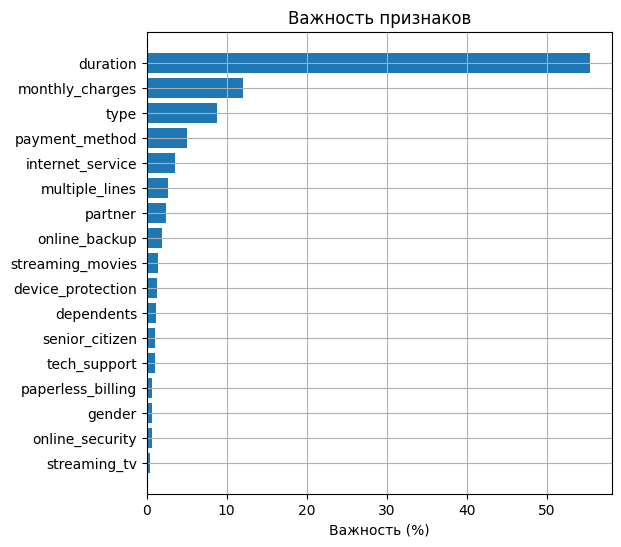

In [116]:
# получим список с названиями признаков и массив с их важностью
names = catboost_best_model[0].feature_names_
importances = catboost_best_model[0].feature_importances_

# отсортируем признаки по возрастанию важности
sorted_idx = importances.argsort()[::1]

# затем построим график важности признаков
plt.figure(figsize=(6,6), dpi=100)
plt.barh(names, importances[sorted_idx])
plt.yticks(range(len(names)), np.array(names)[sorted_idx])
plt.grid(True)
plt.title('Важность признаков', fontsize=12)
plt.xlabel('Важность (%)', fontsize=10)
plt.show()

Рассмотрим признаки, влияющие на уход клиентов `outflow` больше остальных.

Длительность договора `duration`:

In [117]:
data.groupby('duration')['outflow'].mean().head()

duration
0     0.000000
28    1.000000
30    1.000000
31    0.012712
59    1.000000
Name: outflow, dtype: float64

Ежемесячные траты на услуги `monthly_charges`:

In [118]:
data.groupby('monthly_charges')['outflow'].mean().head()

monthly_charges
18.25    0.0
18.40    1.0
18.55    0.0
18.70    0.0
18.75    0.0
Name: outflow, dtype: float64

Тип оплаты: ежемесячный, годовой и т.д. `type`:

In [119]:
data.groupby('type')['outflow'].mean().head()

type
Month-to-month    0.105032
One year          0.212492
Two year          0.224779
Name: outflow, dtype: float64

Тип подключения интернета ("DSL" или "Fiber optic") `internet_service`:

In [120]:
data.groupby('internet_service')['outflow'].mean().head()

internet_service
DSL            0.142916
Fiber optic    0.192183
No             0.104849
Name: outflow, dtype: float64

Способ оплаты `payment_method`:

In [121]:
data.groupby('payment_method')['outflow'].mean().head()

payment_method
Bank transfer (automatic)    0.205311
Credit card (automatic)      0.208279
Electronic check             0.147992
Mailed check                 0.072581
Name: outflow, dtype: float64

У всех трёх категориальных признаков `type`, `internet_service` и `payment_method` - более двух классов с преобладанием одного их них (см. [**Распределение категориальных признаков**](#Распределение-категориальных-признаков)).

Для сравнения выведем несколько самых маловажных признаков.

Пол клиента `gender`:

In [122]:
data.groupby('gender')['outflow'].mean()

gender
Female    0.151376
Male      0.161181
Name: outflow, dtype: float64

Блокировка небезопасных сайтов `online_security`:

In [123]:
data.groupby('online_security')['outflow'].mean()

online_security
No     0.136545
Yes    0.205547
Name: outflow, dtype: float64

Стриминговое телевидение `streaming_tv`:

In [124]:
data.groupby('streaming_tv')['outflow'].mean()

streaming_tv
No     0.119234
Yes    0.215737
Name: outflow, dtype: float64

Из выведенных средних значений видно, что только пять признаков имеют значимое влияние на отток клиентов. У оставшихся признаков составы классов примерно одинаковы, а значит влияние этих признаков на отток клиентов невелико.

### Матрица ошибок
<a name="74"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Матрица ошибок выглядит так:

|        |       |                          |                         |
| ------ |-------| :----------------------: | :---------------------: |
| Ответы | **0** | **True <br/> Negative**  | **False <br/> Positive**|
| Ответы | **1** | **False <br/> Negative** | **True <br/> Positive** |
|        |       |          **0**           |          **1**          |
|        |       |      Предсказания        |      Предсказания       |


Поясним обозначения:

- *True Positive, TP* - истинно положительные ответы в правом нижнем углу матрицы,
- *False Positive, FP* - ложноположительные ответы в правом верхнем углу,
- *True Negative, TN* - истинно отрицательные ответы в левом верхнем углу,
- *False Negative, FN* - ложноотрицательные ответы в левом нижнем углу,
- *P = TP + FN* - общее количество положительных ответов (объекты класса "1"),
- *N = FP + TN* - общее количество отрицательных ответов (объекты класса "0").

Рассчитаем матрицу ошибок для модели `CatBoostClassifier` на тестовой выборке.

In [125]:
# Выведем баланс классов в таргете на тестовой выборке
y_test.value_counts()

0    1486
1     275
Name: outflow, dtype: int64

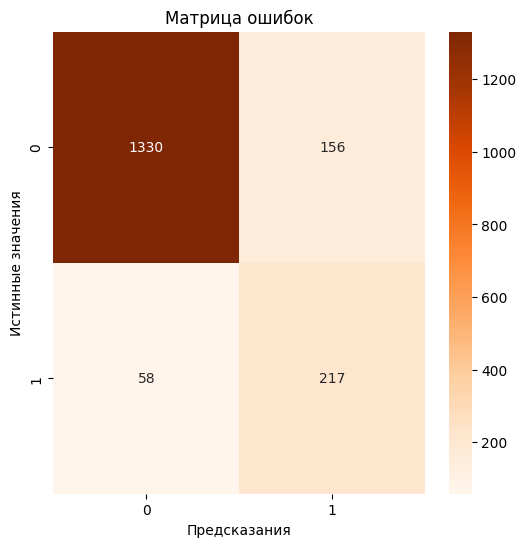

In [126]:
# построим матрицу ошибок
matrix = confusion_matrix(y_test,
                          catboost_best_model[0].predict(X_test_scaler))

# построим тепловую карту (хитмэп) матрицы ошибок
plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(matrix, annot=True, fmt='g', cmap='Oranges')
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.show()

По матрице ошибок нам необходимо определить:
- долю ложноположительных ответов, *FP / N* (оператор предложил промокоды клиентам, которые не планировали уходить);
- долю ложноотрицательных ответов, *FN / P* (оператор не предложил промокоды клиентам, которые ушли).

Для расчёта значений воспользуемся формулами:

*FP / N = (FP / (FP + TN))*

*FN / P = (FN / (TP + FN))*

|        |        |
| ------ | ------ |
| **TN** | **FP** |
| **FN** | **TP** |

In [127]:
matrix = confusion_matrix(y_test,
                          catboost_best_model[0].predict(X_test_scaler))

matrix

array([[1330,  156],
       [  58,  217]])

Доля ложноположительных ответов *FP / N* на тестовой выборке.

In [128]:
fp_n = (matrix[0][1] / (matrix[0][1] + matrix[0][0]))
print(f'{fp_n:.1%}')

10.5%


Доля ложноотрицательных ответов *FN / P* на тестовой выборке.

In [129]:
fn_p = (matrix[1][0] / (matrix[1][1] + matrix[1][0]))
print(f'{fn_p:.0%}')

21%


На тестовой выборке доля ложноотрицательных ответов (21%) почти в 2 раза превышает долю ложноположительных (10,5%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.

### *ROC*-кривая
<a name="75"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим *ROC*-кривую для модели градиентного бустинга **`CatBoostClassifier`** на тестовой выборке.

Для построения *ROC*-кривой необходимо на графике отобразить по горизонтали характеристику *FPR*, а по вертикали - *TPR*.

При этом:
- *TPR = TP / P*, где *P = TP + FN*,
- *FPR = FP / N*, где *N = FP + TN*,

где
- *True Positive Rate, TPR* - доля верно предсказанных объектов к общему числу объектов класса (*recall*, "полнота"),
- *False Positive Rate, FPR* - доля ложных срабатываний к общему числу объектов за пределами класса.

Переберём значения порога `thresholds` модели `CatBoostClassifier` и проведём кривую. Она называется *ROC*-кривая, или кривая ошибок (от англ. *receiver operating characteristic*, «характеристика работы приёмника»; термин пришёл из теории обработки сигналов).

Для модели, которая всегда отвечает случайно, *ROC*-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение *TPR* и лучше качество модели.

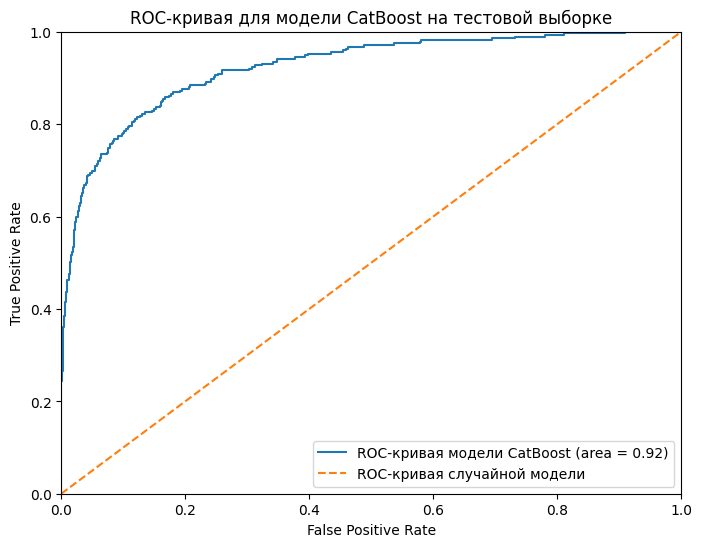

In [130]:
# построим ROC-кривую для модели градиентного бустинга
# CatBoostClassifier на тестовой выборке
fpr_cat_test, tpr_cat_test, thresholds = roc_curve(
    y_test, probabilities_one_cat_test)

plt.figure(figsize=(8,6))

# построим график
plt.plot(fpr_cat_test, tpr_cat_test)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применим функции plt.xlim() и plt.ylim(),
# чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# подпишем кривые
plt.legend(['ROC-кривая модели CatBoost (area = %0.2f)' % roc_auc_cat_test,
            'ROC-кривая случайной модели'])

# применим функции plt.xlabel() и plt.ylabel(), чтобы подписать оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая для модели CatBoost на тестовой выборке')

plt.show()

На графике видно, что площадь под *ROC*-кривой модели градиентного бустинга `CatBoostClassifier` *AUC-ROC* = 0.92, что значительно превышает площадь под *ROC*-кривой случайной модели *AUC-ROC* = 0.5.

### Вывод
<a name="76"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Тестирование лучшей модели**](#Тестирование-лучшей-модели) были выполнены следующие задачи:
1. качесто выбранной модели проверено на тестовой выборке;
2. полученная модель проверена на адекватность;
3. выполнен анализ важности признаков;
4. рассчитана матрица ошибок;
5. построена *ROC*-кривая.

В результате выполнения задач этого раздела было выявлено следующее:
- Лучшая модель градиентного бустинга **`CatBoostClassifier`** на тестовой выборке имеет следующие значения метрик оценки качества:
  - ***AUC-ROC = 0.92***;
  - ***accuracy = 0.88***.
- Наивные прогнозы *AUC-ROC* = 0.50 и *accuracy* = 0.84, что гораздо ниже значений этих метрик, полученных с помощью модели `CatBoostClassifier` на тестовой выборке. Поэтому модель `CatBoostClassifier` можно считать адекватной.
- Из выведенных средних значений видно, что только пять признаков имеют значимое влияние на отток клиентов. У оставшихся признаков составы классов примерно одинаковы, а значит влияние этих признаков на отток клиентов невелико.
- На тестовой выборке доля ложноотрицательных ответов (21%) почти в 2 раза превышает долю ложноположительных (10,5%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.
- Площадь под *ROC*-кривой модели градиентного бустинга `CatBoostClassifier` (*AUC-ROC* = 0.92) значительно превышает площадь под *ROC*-кривой случайной модели (*AUC-ROC* = 0.5).

## Общий вывод
<a name="8"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Нами проведено исследование, с целью построения модели машинного обучения, которая поможет прогнозировать отток клиентов.

Поставленная задача была решена с помощью модели градиентного бустинга **`CatBoostClassifier`**.

Результаты исследования позволят оператору связи выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия.

Входные данными были персональные данные о некоторых клиентах, информация об их тарифах и договорах на 1 февраля 2020 года.

В разделе [**исследования данных**](#Исследование-данных) была изучена общая информация о данных, а именно информация о договоре, персональных данных клиента, интернет-услугах и услугах телефонии.

В разделе [**анализа данных и подготовки признаков**](#Анализ-данных-и-подготовка-признаков) было выполнено объединение выборок. Также была проведена работа с признаками - добавление, удаление, переименование и преобразование признаков. Пропуски были заполнены, некоторые типы данных изменены. Исследованы численные и категориальные признаки. После проверки на мультиколлинеарность, мультиколлинеарные признаки были удалены.

В разделе [**подготовки к обучению**](#Подготовка-к-обучению) данные были разделены на обучающую и тестовую выборки, выполнено кодирование категориальных признаков с помощью техники прямого кодирования *One-Hot Encoding* (*OHE*) и масштабирование численных признаков для разных моделей.

В разделе [**обучения моделей**](#Обучение-моделей) была написана функция `fit_model()` для обучения и вычисления метрик *AUC-ROC* и *accuracy* для моделей с использованием `GridSearchCV`. Затем мы обучили четыре модели: `LogisticRegression`, `RandomForestClassifier`, `LGBMClassifier` и `CatBoostClassifier` с различными гиперпараметрами.

В ходе исследования удалось получить следующие результаты **на обучающей выборке**:

1. Модель логистической регрессии **`LogisticRegression`** имеет следующие значения метрик оценки качества:
   - *AUC-ROC = 0.75*
   - *accuracy = 0.69*


2. Лучшая модель случайного леса **`RandomForestClassifier`** имеет следующие значения метрик оценки качества:
    - *AUC-ROC = 0.82*
    - *accuracy = 0.85*

   при следующих гиперпараметрах:
    - глубина дерева: `max_depth` = 7
    - количество деревьев: `n_estimators` = 60
   

3. Лучшая модель градиентного бустинга **`LGBMClassifier`** имеет следующие значения метрик оценки качества:
    - *AUC-ROC = 0.87*
    - *accuracy = 0.82*

   при следующих гиперпараметрах:
    - глубина дерева: `max_depth` = 4
    - количество деревьев: `n_estimators` = 200
    - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.1


4. Лучшая модель градиентного бустинга **`CatBoostClassifier`** имеет следующие значения метрик оценки качества:
   - *AUC-ROC = 0.90*
   - *accuracy = 0.86*

   при следующих гиперпараметрах:
   - глубина дерева: `depth` = 5
   - количество итераций: `iterations` = 300
   - коэффициент скорости обучения (размер шага градиентного спуска): `learning_rate` = 0.15


После обучения всех моделей, была создана [**сводная таблица**](#Сравнение-моделей) и в качестве лучшей выбрана модель **`CatBoostClassifier`**, у которой на обучающей выборке были значения метрик оценки качества ***AUC-ROC = 0.90*** и ***accuracy = 0.86***.

Затем качество лучшей модели было [**проверено на тестовой выборке**](#Тестирование-лучшей-модели). Лучшая модель градиентного бустинга **`CatBoostClassifier`** на тестовой выборке имеет значения метрик оценки качества ***AUC-ROC = 0.92*** и ***accuracy = 0.88***.

По сравнению с обучающей выборкой, качество лучшей модели на тестовой выборке не ухудшилось.

_____________________ ______________________ ______________________
Исходя из полученных результатов, можно сделать следующие **выводы**:

1. В качестве лучшей выбрана модель градиентного бустинга **`CatBoostClassifier`**, которая **на тестовой выборке** имеет следующие значения метрик оценки качества:
   - ***AUC-ROC = 0.92***
   - ***accuracy = 0.88***


2. Значение метрики ***AUC-ROC*** на тестовой выборке превышает ***0.85***, что соответствует изначальному требованию в условии задачи проекта.


3. На тестовой выборке доля ложноотрицательных ответов (21%) почти в 2 раза превышает долю ложноположительных (10,5%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.

______________________ ______________________ ______________________   
**Общие рекомендации:**

Оператору связи можно рекомендовать использовать полученную модель градиентного бустинга `CatBoostClassifier` с поправкой на дисбаланс классов в таргете, т.к. при имеющихся входных данных модель склонна пропускать клиентов, которые планируют уйти.

______________________ ______________________ ______________________
На этом мы заканчиваем и благодарим вас за внимание. Надеемся, что наше исследование вам понравилось и поможет сделать правильные выводы, принять правильные решения.

## Отчёт по решению задачи: Прогнозирование оттока клиентов для телеком компании
<a name="9"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

[<h2> 1. Описание проекта <a class="tocSkip"> </h2>](#Описание-проекта)

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

[<h2> 2. Цель проекта <a class="tocSkip"> </h2>](#Цель-проекта)

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать отток клиентов.

Результаты исследования позволят оператору связи выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия.

[<h2> 3. Задачи проекта <a class="tocSkip"> </h2>](#Задачи-проекта)

1. Исследовать данные.
2. Провести анализ данных и подготовить признаки.
3. Построить и обучить модели.
4. Провести тестирование лучшей модели.
5. Написать общий вывод.

[<h2> 4. Входные данные <a class="tocSkip"> </h2>](#Описание-данных)

Персональные данные о некоторых клиентах, информация об их тарифах и договорах на 1 февраля 2020 года.

[<h2> 5. План работы <a class="tocSkip"> </h2>](#План-работы)

В ходе работы были выполнены все пункты плана.

[<h3> 1. Данные предварительно исследованы. <a class="tocSkip"> </h3>](#Исследование-данных)

1. Загружены четыре исходные выборки:
    - `contract.csv` — информация о договоре;
    - `personal.csv` — персональные данные клиента;
    - `internet.csv` — информация об интернет-услугах;
    - `phone.csv` — информация об услугах телефонии.

    
2. Изучена общая информация о данных четырёх исходных выборок:
    - размеры выборок;
    - уникальные значения;
    - пропуски;
    - дубликаты;
    - гисторгамма распределения численных переменных.

    
**В результате выполнения задач раздела [Исследование данных](#Исследование-данных) было выявлено следующее:**
- В каждой из четырёх таблиц все значения признака `customerID`- уникальны, что даёт возможность объединенить выборки по этому признаку с использованием метода `.merge()`.
- Таблицы имеют разные размеры.
- Во всех четырёх таблицах отсутствуют пропуски и явные дубликаты.
- Признаки `MonthlyCharges` и `SeniorCitizen` имеют числовой тип данных, остальные признаки имеют тип данных `object`.


[<h3> 2. Выполнен анализ данных и подготовка признаков. <a class="tocSkip"> </h3>](#Анализ-данных-и-подготовка-признаков)

1. Исходные выборки объединены
2. Пропуски заполнены.
3. Для некоторых признаков изменены типы данных.
4. *Feature Engineering* (добавлены новые признаки(`duration`, `outflow`), удалены ненужные).
5. Названия признаков приведены к нижнему регистру.  
6. **[Исследованы численные признаки (EDA)](#Исследование-численных-признаков)**:
    
    - `begin_date` - дата начала пользования услугами;
    - `end_date` - дата окончания пользования услугами;
    - `duration` - длительность договора;
    - `monthly_charges` ежемесячные траты на услуги;
    - `total_charges` - суммарные траты на услуги;
    - признаки проверены на мультиколлинеарность.
    
    
В результате выполнения задач подраздела [**Исследование численных признаков**](#Исследование-численных-признаков) было выявлено следующее:
- Начиная с середины 2018 года проводятся компании по привлечению клиентов к заключению договоров.
- Из [распределения на графике](#график) видно, что оператор связи обоснованно поставил цель удержания клиентов. Т.к. с декабря 2019 года наблюдается отток клиентов.
- Почти 250 клиентов отказались от услуг оператора связи уже в первый месяц пользования услугами. Исходя из распределения количества договоров в краткосрочной зоне, можно сделать вывод, что основной вклад в отток клиентов делают именно договора, заключённые недавно. Это и сподвигло оператора связи провести исследование с целью выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия для удержания клиентов.
- Основной ежемесячный вклад в сегмент с самой низкой стоимостью дают интернет-услуги, а в диапазоне от 50 до 120 рублей - поровну с телефонией. Также это говорит о том, что ежемесячные услуги телефонии, в целом, стоят дороже, чем интернет-услуги.
- Суммарно основной вклад в услуги низкой ценовой категории вносят интернет-услуги, а более высокой ценовой категории - услуги телефонии.
- Сильная корреляция наблюдается между признаками `total_charges` и `duration`.

    
7. **[Исследованы категориальные признаки (EDA)](#Исследование-категориальных-признаков)**:
    
    - `type` - тип оплаты (преобладает класс "Month-to-month" - ежемесячный тип оплаты);
    - `paperless_billing` - электронный платёжный документ (преобладает класс "Yes" - наличие);
    - `payment_method` - способ оплаты (преобладает класс "Electronic check" - оплата с электронным чеком);
    - `senior_citizen` - наличие пенсионного статуса по возрасту (преобладает класс "No" - отсутствие);
    - `dependents` - наличие иждивенцев (преобладает класс "No" - отсутствие);
    - `internet_service` - тип подключения интернета (преобладает класс "Fiber optic" - оптоволоконный интернет);
    - `online_security` - блокировка небезопасных сайтов (преобладает класс "No" - отсутствие услуги);
    - `online_backup` - облачное хранилище файлов для резервного копирования данных (преобладает класс "No" - отсутствие услуги);
    - `device_protection` - антивирус (преобладает класс "No" - отсутствие услуги);
    - `tech_support` - выделенная линия технической поддержки (преобладает класс "No" - отсутствие услуги);
    - `streaming_tv` - стриминговое телевидение (преобладает класс "No" - отсутствие услуги);
    - `streaming_movies` - каталог фильмов (преобладает класс "No" - отсутствие услуги);
    - `multiple_lines` - наличие возможности ведения параллельных линий во время звонка (преобладает класс "No" - отсутствие услуги);
    - `outflow` - уход клиента (преобладает класс "No" - отсутствие);
    - `gender` - пол (классы "Yes" и "No", отсутствует преобладание какого-либо из классов);
    - `partner` - наличие супруга(и) (классы "Yes" и "No", отсутствует преобладание какого-либо из классов);
    - признаки проверены на мультиколлинеарность.
    - из-за того, что мультиколлинеарность может повлиять на важность признаков, и, как следствие - интерпретируемость модели, были удалены признаки, у которых имеется высокая корреляция с `duration`:
        - `begin_date`,
        - `total_charges`,
    
    а также `end_date`, т.к. этот признак мы заменили на `outflow`.

    
В результате выполнения задач подраздела [**Исследование категориальных признаков**](#Исследование-категориальных-признаков) было выявлено следующее:
- Датасет не сбалансирован в таргете `outflow`.
- У 14 из 16 категориальных признаков присутствует преобладание какого-либо из классов.
- Состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) в 6 раза меньше, чем оставшихся.
- В качестве бизнес-метрики в этой задаче использовали *AUC-ROC*, которая не чувствительна к дисбалансу классов.
- Матрица показывает, что у признака `duration` имеется высокая корреляция (> 0.8) с признаками `total_charges` и `begin_date`, а корреляция между признаками `end_date` и `outflow` равна "1", т.к. `end_date` мы заменили на `outflow`.
- Парные графики корреляций показывают высокую мультиколлинеарность между признаками `duration` и `total_charges`, а также между `monthly_charges` и `total_charges`.   
    
    
8. Все признаки визуализированы.
9. Проведён анализ признаков на мультиколлинеарность (корреляция Пирсона для численных признаков, *phi_k*-корреляция - для категориальных признаков) и корреляция с целевым признаком.
10. Проведена проверка на дисбаланс классов в таргете, чувствительность метрики к дисбалансу.
   

**В результате выполнения задач раздела [Анализ данных и подготовка признаков](#Анализ-данных-и-подготовка-признаков) было выявлено следующее:**
- Из [распределения на графике](#график) видно, что оператор связи обоснованно поставил цель удержания клиентов. Т.к. с октября 2019 года наблюдается отток клиентов.
- В результате исследовательского анализа был выявлен дисбаланс классов у большинства категориальных признаков. В качестве основной метрики мы использовали *AUC-ROC*, которая не чувствительна к дисбалансу классов.
- В результате исследовательского анализа было выявлено наличие мультиколлинеарных признаков. Мультиколлинеарные признаки необходимо удалять для линейных моделей. В логистической регрессии от `sklearn` заложена регуляризация, поэтому для нее мультиколлинеарность не страшна, как и для деревянных и бустинговых моделей. Но мультиколлинеарность может повлиять на важность признаков, и, как следствие - интерпретируемость модели. Поэтому решение об удалении зависит от поставленной задачи. В целом если удаление признака не приведет к явному ухудшению модели, то можно удалить. По этой причине признаки `end_date`, `begin_date` и `total_charges` были удалены.
- Таким образом, для обучения моделей использовали все вышеперечисленные категориальные и численные признаки за вычетом `end_date`, `begin_date` и `total_charges`. Всего: 17 признаков + таргет `outflow`.

   
[<h3> 3. Выполнено построение и обучение моделей. <a class="tocSkip"> </h3>](#Обучение-моделей)

1. В разделе [Подготовка к обучению](#Подготовка-к-обучению) выделенные признаки и таргет разбиты на обучающую и тестовую выборки в пропорции 3 к 1 (`test_size`=0.25).
2. После разбиения выборок выполнено кодирование категориальных и масштабирование численных признаков.
3. В разделе [Обучение моделей](#Обучение-моделей) построены и обучены следующие модели: 
    - [`LogisticRegression`](#LogisticRegression);
    - [`RandomForestClassifier`](#RandomForestClassifier);
    - [`LGBMClassifier`](#LGBMClassifier);
    - [`CatBoostClassifier`](#CatBoostClassifier). 
    
    
4. Модели выводят метрики *AUC-ROC* и *accuracy*. При этом у моделей `LGBMClassifier` и `CatBoostClassifier` метрика *AUC-ROC* превышает пороговое значение >= 0.85.
5. Выполнен подбор гиперпараметров с помощью функции `GridSearchCV`.
    
    
**В результате выполнения задач разделов [Подготовка к обучению](#Подготовка-к-обучению) и [Обучение моделей](#Обучение-моделей) были получены следующие [значения метрик *AUC-ROC* и *accuracy*](#Сравнение-моделей) на обучающей выборке:**

    
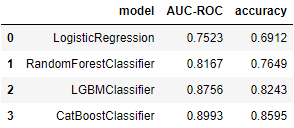

    
- По результатам кроссвалидации выбрана итоговая модель `CatBoostClassifier` со следующими значениями метрик оценки качества **на обучающей выборке**:
    - ***AUC-ROC = 0.90***
    - ***accuracy = 0.86***
     
    
при следующих [параметрах](#CatBoostClassifier):


```
Best params: {'depth': 5, 
              'iterations': 300, 
              'learning_rate': 0.15}
```

Где:  
- `depth` - глубина дерева;
- `iterations` - количество итераций;
- `learning_rate` - коэффициент скорости обучения (размер шага градиентного спуска).



и при следующей сетке [гиперпараметров](#CatBoostClassifier):

```
catboost_param_grid = {
    # глубина дерева:
    'depth': range(2, 12, 3),
    # количество итераций:
    'iterations': range(250, 301, 50),
    # коэффициент скорости обучения (размер шага градиентного спуска):
    'learning_rate': [0.05, 0.1, 0.15]
}
```

[<h3> 4. Лучшая модель протестирована. <a class="tocSkip"> </h3>](#Тестирование-лучшей-модели)

1. Проверено качество итоговой модели `CatBoostClassifier` **на тестовой выборке**.
2. Выполнено сравнение полученных предсказаний с предсказаниями константной модели с помощью `DummyClassifier`.
3. Выполнен [анализ важности признаков](#Анализ-важности-признаков).        
    

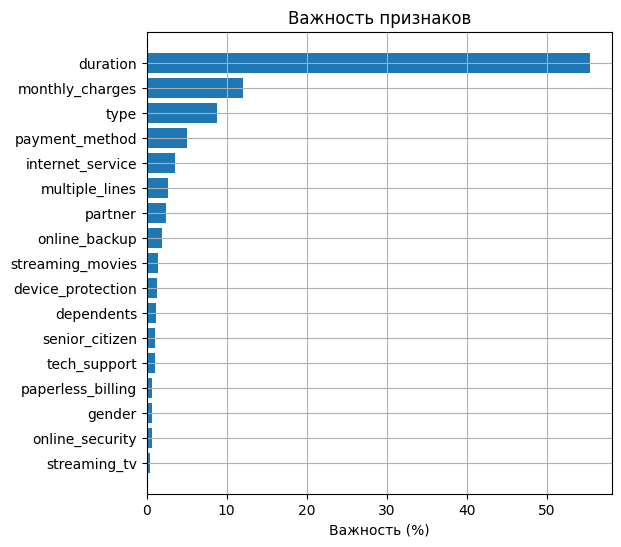
    
В результате было выявлено, что наиболее важными признаками для модели являются:
- `duration`;
- `monthly_charges`;
- `type`;
- `payment_method`;
- `internet_service`.

4. Построена [матрица ошибок](#Матрица-ошибок).
    

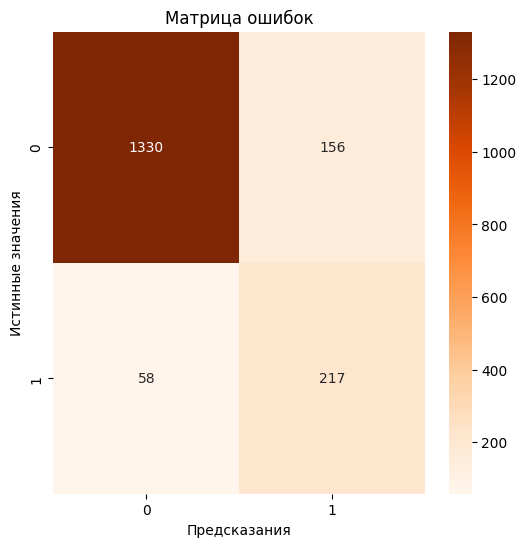

В результате построения матрицы ошибок было выявлено, что доля ложноотрицательных ответов (21%) почти в 2 раза превышает долю ложноположительных (10,5%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете. 

5. Построена [*ROC*-кривая](#ROC-кривая).
    

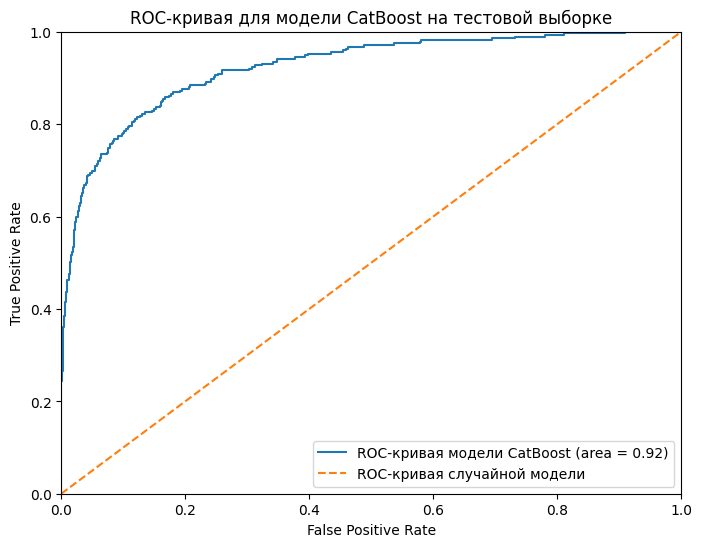    
    
На графике видно, что площадь под *ROC*-кривой модели градиентного бустинга `CatBoostClassifier` (*AUC-ROC* = 0.92) значительно превышает площадь под *ROC*-кривой случайной модели (*AUC-ROC* = 0.5).

    
**В результате выполнения задач раздела [Тестирование лучшей модели](#Тестирование-лучшей-модели) было выявлено следующее:**
- Лучшая модель градиентного бустинга **`CatBoostClassifier` на тестовой выборке** имеет следующие значения метрик оценки качества:
        
    - ***AUC-ROC = 0.92***;
    - ***accuracy = 0.88***.
    
    
- Наивные прогнозы *AUC-ROC* = 0.50 и *accuracy* = 0.84, что гораздо ниже значений этих метрик, полученных с помощью модели `CatBoostClassifier` на тестовой выборке. Поэтому модель `CatBoostClassifier` можно считать адекватной.
- Из выведенных средних значений видно, что только пять признаков имеют значимое влияние на отток клиентов. У оставшихся признаков составы классов примерно одинаковы, а значит влияние этих признаков на отток клиентов невелико.
- Доля ложноотрицательных ответов (21%) почти в 2 раза превышает долю ложноположительных (10,5%), а значит модель лучше прогнозирует объекты отрицательного класса (клиенты остались), что является следствием дисбаланса классов в таргете.
- Площадь под *ROC*-кривой модели градиентного бустинга `CatBoostClassifier` (*AUC-ROC* = 0.92) значительно превышает площадь под *ROC*-кривой случайной модели (*AUC-ROC* = 0.5).    
    

[<h3> 5. Написан общий вывод. <a class="tocSkip"> </h3>](#Общий-вывод)
    
    
<h3> 6. Трудности при выполнении задачи. <a class="tocSkip"> </h3>

[]()
1. Основные трудности возникли с интерпретацией результатов проверки признаков на мультиколлинеарность и расчёта их корреляции. В связи с чем, поначалу, было ошибочно принято решение удалить признак `monthly_charges`. Затем этот признак был все-таки сохранён.
    
2. Также, первоначально, был выбран не совсем корректный способ кодирования категориальных признаков: с помощью метода `pandas` - `.get_dummies()`. Этот метод был заменён на использование функции `OneHotEncoder()` библиотеки `sklearn`.
    
3. В первом варианте для бустинговой модели `CatBoostClassifier` в параметрах не был указан список категориальных признаков, из-за чего в начале работы с моделью код падал с ошибкой. *CatBoost* применяет различные техники кодирования категориальных признаков. И дополнительное преобразование категориальных признаков в численные здесь не нужно (т.е. не нужно *OHE*-кодирование). Но, тем не менее, список категориальных переменных необходимо указывать в параметрах модели. В итоговом варианте в модели был добавлен параметр `cat_features=categorical_2`, где переменная `categorical_2` - это список категориальных признаков.   

4. На ранних вариантах моделирования и тестирования был сильный дисбаланс классов в целевом признаке `outflow`. Поэтому было решено применить к моделям функцию балансировки классов `class_weight='balanced'`, `auto_class_weights='Balanced'`. Несбалансированность классов всё ещё осталась, но уже не такая большая: 2-кратная разница против 30-кратной при отсутствии балансировки. Итоговые метрики незначительно снизились, но не ниже порога в условии задачи (AUC-ROC >= 0.85).
    
<h3> 7. Ключевые шаги в решении задачи. <a class="tocSkip"> </h3>
    
[]()    
1. Внешнее объединение четырёх исходных выборок по уникальным ID клиентов и заполнение пропусков значением "No", т.к. пропуск означает, что клиент не пользуется данной услугой.
2. Преобразование признака `end_date` (дата окончания пользования услугами) в целевой признак - `outflow` (уход клиента).
3. Замена признаков `end_date` и `begin_date` (дата начала пользования услугами) на новый признак `duration` (длительность договора) с последующей заменой его типа данных с `timedelta` на `integer`. Тем самым мы убрали из данных признаки с типом данных `datetime`, который принимают не все построенные модели.
4. Разделение на обучающую и тестовую выборки, и последующее *OHE*-кодирование категориальных признаков на обучающей выборке.
5. Выбор лучшей модели `CatBoostClassifier` на основании качества метрик на обучающей выборке.
6. Получение на тесте лучшей модели `CatBoostClassifier` итоговых метрик качества *AUC-ROC* и *accuracy*. На основе значений вероятностей классов в данных по уникальным кодам ID модель может определить, какие именно клиенты планируют расторгнуть договор с оператором связи.
7. Выделение пяти самых важных признаков, оказывающих основное влияние на предсказание таргета `outflow` - уход клиента.
8. Построение матрицы ошибок, которая показала, что модель лучше прогнозирует объекты отрицательного класса (клиенты остались), и это является следствием дисбаланса классов в таргете.
    

**Общие рекомендации:**

Оператору связи можно рекомендовать использовать полученную модель градиентного бустинга `CatBoostClassifier` с поправкой на дисбаланс классов в таргете, т.к. при имеющихся входных данных модель даже с балансировкой классов имеет небольшую склонность пропускать клиентов, которые планируют уйти.